<a href="https://colab.research.google.com/github/estebanoli8/secop_valle_mujer/blob/main/hacemos_con_ingenieria_equidad_de_genero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hola mundo, esta es una prueba!

### Protocolo Socrata (SoQL) para Consultas Eficientes

Al interactuar con la API de datos.gov.co (que usa el lenguaje de consulta Socrata - SoQL), formulamos nuestras solicitudes a través de la URL del endpoint de la API. Para hacerlo de manera eficiente y manejar posibles limitaciones del servidor (como tamaños máximos de página o tiempos de espera), es útil entender los siguientes parámetros:

*   **`$select`**: Especifica las columnas que deseas recuperar. Seleccionar solo las columnas necesarias (`count(*)`, en nuestro caso inicial) es más eficiente que seleccionar todas (`*`).
*   **`$where`**: Define las condiciones de filtrado. Combinar múltiples condiciones con `AND` y `OR` te permite obtener solo los datos relevantes. Utilizar los nombres exactos de los campos API es crucial.
*   **`$limit`**: Limita el número de registros retornados en una sola respuesta. Esto es fundamental para manejar grandes conjuntos de resultados y evitar sobrecargar el servidor o tu conexión. El servidor puede tener un límite máximo por defecto si no se especifica.
*   **`$offset`**: Se utiliza junto con `$limit` para la paginación, permitiéndote obtener "páginas" sucesivas de resultados (por ejemplo, los siguientes 100 registros después de los primeros 100).
*   **`$order`**: Ordena los resultados, lo cual puede ser útil para análisis pero puede impactar el rendimiento en consultas muy grandes.
*   **Formato de respuesta**: Usamos `.json` al final del endpoint para solicitar los datos en formato JSON, que es fácil de parsear en Python.

Para tu solicitud actual, nos enfocaremos en construir la cláusula `$where` con los nuevos y existentes criterios y usar `$select=count(*)` para obtener el número total de coincidencias, que es eficiente.

### Construcción de la Consulta Actualizada

# Task
Realiza un análisis exploratorio de los 3255 contratos encontrados en la consulta anterior, discriminando la entidad que realizó los contratos, una línea de tiempo del valor de la contratación acumulado por mes desde la fecha más antigua hasta hoy, una gráfica univariable del valor del contrato, un histograma de tipo de contrato y modalidad de selección, y un top 10 de nombres de contratistas.

## Consultar y descargar los datos

### Subtask:
Modificar la consulta API para descargar los datos completos de los 3255 contratos que cumplen con los criterios (NITs especificados y objeto contractual con alguna de las palabras clave de género), seleccionando las columnas necesarias para el análisis (entidad, fecha de firma/inicio, valor del contrato, objeto, tipo de contrato, modalidad de contratación, nombre del contratista).


**Reasoning**:
Define the columns to select, construct the base query with filters, and set up the loop for paginated data retrieval to get all 3255 contracts.



## Cargar datos en dataframe

### Subtask:
Cargar los datos obtenidos en un DataFrame de pandas.


**Reasoning**:
Check if the `all_contracts_data` list is not empty and create a pandas DataFrame if it contains data.



## Limpieza y preparación de datos

### Subtask:
Realizar una limpieza básica si es necesario (por ejemplo, convertir el valor del contrato a numérico, manejar fechas).


**Reasoning**:
Check if the dataframe is empty and proceed with cleaning if it's not. The cleaning steps involve converting columns to numeric and datetime types, handling potential errors, and creating a final value column.



## Analisis y visualizacion de la entidad

### Subtask:
Discriminar qué entidades específicas están representadas en estos contratos (usando la columna `nombre_de_la_entidad` o similar) y mostrar su distribución.


**Reasoning**:
Check if the DataFrame is empty before proceeding with value counts and plotting.



## Analisis y visualizacion del valor del contrato

### Subtask:
Explorar la distribución del valor del contrato univariablemente (por ejemplo, con un histograma o box plot) y calcular el valor total y promedio.


**Reasoning**:
Check if the DataFrame is empty before attempting to perform calculations and generate plots for the value distribution.



## Analisis de tipos de contrato y modalidades de selección

### Subtask:
Crear histogramas para visualizar la distribución de los tipos de contrato y las modalidades de selección.


**Reasoning**:
Check if the DataFrame is empty, and if not, calculate and plot the distribution of contract types and selection modalities using histograms as requested by the subtask instructions.



## Analisis de contratistas

### Subtask:
Identificar el top 10 de nombres de contratistas que aparecen en estos contratos.


**Reasoning**:
Check if the DataFrame is empty and if not, calculate and print the top 10 contractors.



## Analisis de línea de tiempo del valor acumulado

### Subtask:
Calcular y visualizar el valor acumulado de la contratación por mes desde la fecha más antigua hasta hoy.


**Reasoning**:
Check if the DataFrame is empty before proceeding with the analysis. If it's empty, print a message and finish the task. If not, proceed to convert columns to the correct types.



In [ ]:
# Este es un marcador de posición para la celda original CQDDApwZhBpI.
# El nuevo código ha sido generado en la celda anterior.

In [ ]:
# --- Nuevo Procedimiento: Interacción Inicial ---

print("--- Paso 1: Interacción inicial con el servicio ---")

import requests
import pandas as pd

# ---- Configuración base ----
DOMAIN = "https://www.datos.gov.co"
DATASET_ID = "rpmr-utcd"
RESOURCE_URL = f"{DOMAIN}/resource/{DATASET_ID}.json"     # SoQL clásico

# Usamos el token proporcionado para las cabeceras (asumiendo que es necesario para interacciones basicas tambien)
APP_TOKEN = "tnXsP2icZ2ugAGaKdSf0QHoWU"
HEADERS = {"X-App-Token": APP_TOKEN}

# Realizar una consulta muy simple para confirmar conectividad y acceso basico
# Por ejemplo, obtener los primeros 5 registros sin filtros complejos
simple_query_params = {
    "$select": "nombre_de_la_entidad, fecha_de_firma_del_contrato, valor_contrato", # Seleccionar algunas columnas basicas
    "$limit": 5 # Limitar a 5 registros
}

print("\n  → Realizando solicitud simple para verificar conexión...")

try:
    response = requests.get(RESOURCE_URL, headers=HEADERS, params=simple_query_params, timeout=30) # Timeout mas corto para verificacion rapida
    response.raise_for_status() # Lanza excepción para códigos de error (como 400 o 403)
    data = response.json()

    if data:
        print("  ✅ Interacción inicial exitosa. Se recibieron datos de ejemplo.")
        # Opcional: mostrar los datos de ejemplo
        # df_sample = pd.DataFrame(data)
        # display(df_sample)
    else:
        print("  ⚠️ Interacción inicial exitosa, pero no se recibieron datos. Verifica el dataset_id o la consulta simple.")

except requests.exceptions.RequestException as e:
    print(f"  ❌ Error en la interacción inicial: {e}")
    if response is not None and response.content:
         print(f"    Contenido de la respuesta de error: {response.content.decode('utf-8')}")


print("\n--- Paso 1 Completado ---")
print("Listo para continuar con el siguiente paso del procedimiento en otra celda.")

--- Paso 1: Interacción inicial con el servicio ---

  → Realizando solicitud simple para verificar conexión...
  ✅ Interacción inicial exitosa. Se recibieron datos de ejemplo.

--- Paso 1 Completado ---
Listo para continuar con el siguiente paso del procedimiento en otra celda.


### Paso 2: Aplicar Filtros e Identificar Contratos para Descarga

En este paso, construiremos la consulta Socrata que filtra los contratos por los NITs específicos de la Gobernación del Valle del Cauca y por la presencia de **alguna** de las palabras clave de género en el objeto contractual. Esta es la combinación de filtros que previamente nos dio un conteo de 3255 contratos.

No descargaremos los datos completos aún en esta celda, solo construiremos la cláusula de filtro y, quizás, verificaremos el conteo nuevamente con esta configuración.

In [ ]:
# --- Paso 2: Aplicar Filtros e Identificar Contratos ---

print("--- Paso 2: Aplicando Filtros ---")

# Importar bibliotecas necesarias
import requests # Importar requests aquí
import pandas as pd # Importar pandas si se usa en esta celda (aunque no directamente en run_count, es buena práctica si se usa en general)


# ---- Configuración base (Redefinidas para esta celda) ----
DOMAIN = "https://www.datos.gov.co"
DATASET_ID = "rpmr-utcd"
RESOURCE_URL = f"{DOMAIN}/resource/{DATASET_ID}.json"     # SoQL clásico
APP_TOKEN = "tnXsP2icZ2ugAGaKdSf0QHoWU" # Usando el token proporcionado

# Encabezados con el App Token (mejores límites de uso)
HEADERS = {"X-App-Token": APP_TOKEN}


# Redefinimos las variables y funciones de filtro necesarias (para asegurar que estén disponibles)
# Asumimos que DOMAIN, DATASET_ID, RESOURCE_URL, APP_TOKEN, HEADERS están disponibles del Paso 1

# Variaciones de NIT para la Gobernación del Valle del Cauca
NIT_VARIANTS = [
    "890399029", "890399029-5", "890.399.029-5", "NIT 890399029-5", "NIT 890.399.029-5", "8903990295" # Added back "8903990295"
]

# Variaciones del Nombre de la Entidad para la Gobernación del Valle del Cauca
ENTITY_NAME_VARIANTS = [
    "gobernación del valle",
    "gobernacion del valle", # Sin tilde
    "gobernación del valle del cauca",
    "gobernacion del valle del cauca", # Sin tilde
    "Gobernación del Valle", # Capitalización inicio
    "Gobernacion del Valle", # Capitalización inicio sin tilde
    "Gobernación del Valle del Cauca", # Capitalización inicio
    "Gobernacion del Valle del Cauca", # Capitalización inicio sin tilde
    "GOBERNACIÓN DEL VALLE", # Todo mayúsculas
    "GOBERNACION DEL VALLE", # Todo mayúsculas sin tilde
    "GOBERNACIÓN DEL VALLE DEL CAUCA", # Todo mayúsculas
    "GOBERNACION DEL VALLE DEL CAUCA" # Todo mayúsculas sin tilde
]


# Palabras clave de género - Usaremos la lista ampliada que nos dio el conteo de 3255
# LISTA AMPLIADA según solicitud del usuario
BASE_GENDER_WORDS = [
    "mujer", "mujeres", "genero", "femenino", "femenina",
    "perspectiva de genero", "equidad de genero",
    "brecha salarial", "enfoque de genero", "violencia de genero", "empoderamiento femenino",
    # Términos agregados (algunos se eliminarán según la solicitud)
    "madres", "embarazo", "madres cabeza", "feminicidio", "matena",
    "gestación", "menstrual", "lactancias", "menstruacion", "mamografia",
    "cuello uterino", "citología", "acoso sexual", "paridad", "cancer de mama",
    "cáncer de seno", "cancer uterino",
    # Palabras eliminadas según la última solicitud: "niñas", "niña", "cuidadoras", "inclusion"
    "materno" # Added 'materno' back as it was in the previous successful count (implied from tilde mapping)
]

# Frases a excluir de la búsqueda
EXCLUDED_PHRASES = [
    "protección balística", "genero musical", "genero cinematográfico", "genero literario",
    # Variaciones de "balística" añadidas
    "balistica", "Balistica", "BALISTICA", "balística", "Balística", "BALÍSTICA"
]


# Generamos variaciones (mayúsculas, capitalizada, tildes) para las palabras clave de género
GENDER_KEYWORDS = set()
# Dictionary to map words with tildes to their forms (base: tilde)
tilde_mapping_gender = {
    "genero": "género",
    "cancer": "cáncer",
    "utero": "útero",
    "gestacion": "gestación",
    "menstruacion": "menstruación",
    "citologia": "citología",
    "mamografia": "mamografía",
    "materno": "materno", # No tilde in base, but included for completeness
    "lactancia": "lactancia", # No tilde
    "lactancias": "lactancias", # No tilde
    "paridad": "paridad" # No tilde
}

# Generate variations specifically for BASE_GENDER_WORDS using the tilde mapping
def generate_gender_variations(word):
    variations = set()
    word_lower = word.lower()
    word_upper = word.upper()
    word_capitalized = word.capitalize()

    # Add basic case variations
    variations.add(word_lower)
    variations.add(word_upper)
    variations.add(word_capitalized)

    # Handle tilde variations
    for base, tilde in tilde_mapping_gender.items():
        if base in word_lower:
             variations.add(word_lower.replace(base, tilde))
             variations.add(word_upper.replace(base.upper(), tilde.upper()))
             if len(word.split()) > 1: # Handle phrases
                 variations.add(word.replace(base, tilde).capitalize())
             else: # Single word
                 variations.add(tilde.capitalize())

        if tilde in word_lower:
             variations.add(word_lower.replace(tilde, base))
             variations.add(word_upper.replace(tilde.upper(), base.upper()))
             if len(word.split()) > 1: # Handle phrases
                 variations.add(word.replace(tilde, base).capitalize())
             else: # Single word
                 variations.add(base.capitalize())
    return variations

for word in BASE_GENDER_WORDS:
    GENDER_KEYWORDS.update(generate_gender_variations(word))

# Additionally, add variations for ENTITY_NAME_VARIANTS to the GENDER_KEYWORDS set
# This seems incorrect based on the user's intent to use ENTITY_NAME_VARIANTS
# as a separate filter. Let's correct this to keep ENTITY_NAME_VARIANTS separate
# and only generate variations for GENDER_KEYWORDS based on BASE_GENDER_WORDS.
# The previous logic in generate_variations was mixing concerns.

# Corrected GENDER_KEYWORDS generation:
GENDER_KEYWORDS = set()
# Dictionary to map words with tildes to their forms (base: tilde) - This mapping is for handling tildes in BASE_GENDER_WORDS
tilde_mapping_gender = {
    "genero": "género",
    "cancer": "cáncer",
    "utero": "útero",
    "gestacion": "gestación",
    "menstruacion": "menstruación",
    "citologia": "citología",
    "mamografia": "mamografía",
    "materno": "materno",
    "lactancia": "lactancia",
    "lactancias": "lactancias",
    "paridad": "paridad"
}

# Generate variations specifically for BASE_GENDER_WORDS using the tilde mapping
def generate_gender_variations(word):
    variations = set()
    word_lower = word.lower()
    word_upper = word.upper()
    word_capitalized = word.capitalize()

    # Add basic case variations
    variations.add(word_lower)
    variations.add(word_upper)
    variations.add(word_capitalized)

    # Handle tilde variations
    for base, tilde in tilde_mapping_gender.items():
        if base in word_lower:
             variations.add(word_lower.replace(base, tilde))
             variations.add(word_upper.replace(base.upper(), tilde.upper()))
             if len(word.split()) > 1: # Handle phrases
                 variations.add(word.replace(base, tilde).capitalize())
             else: # Single word
                 variations.add(tilde.capitalize())

        if tilde in word_lower:
             variations.add(word_lower.replace(tilde, base))
             variations.add(word_upper.replace(tilde.upper(), base.upper()))
             if len(word.split()) > 1: # Handle phrases
                 variations.add(word.replace(tilde, base).capitalize())
             else: # Single word
                 variations.add(base.capitalize())
    return variations

for word in BASE_GENDER_WORDS:
    GENDER_KEYWORDS.update(generate_gender_variations(word))

GENDER_KEYWORDS = list(GENDER_KEYWORDS)
print(f"  → Palabras clave de género generadas ({len(GENDER_KEYWORDS)} variaciones):")
for keyword in sorted(GENDER_KEYWORDS): # Sort for easier reading
    print(f"     - {keyword}")


# --- Build Filter Functions --- # Added back function definitions
def build_filter_any(field, patterns, match_type="exact"):
    """Construye una cláusula WHERE para buscar CUALQUIERA de los patrones."""
    if match_type == "exact":
        parts = [f"{field} = '{p.replace('\'', "''")}'" for p in patterns if p.strip()]
    elif match_type == "like":
        # Para LIKE, aseguramos el uso de lower() en el campo si es texto
        parts = [f"lower({field}) LIKE '%{p.replace('\'', "''").lower()}%'"
                 for p in patterns if p.strip()]
    else:
        raise ValueError("match_type debe ser 'exact' o 'like'")
    return "(" + " OR ".join(parts) + ")"

def build_filter_not_like_any(field, patterns):
    """Construye una cláusula WHERE para EXCLUIR registros que contengan CUALQUIERA de los patrones."""
    # Aseguramos el uso de lower() en el campo y en los patrones para la exclusión
    parts = [f"lower({field}) NOT LIKE '%{p.replace('\'', "''").lower()}%'"
             for p in patterns if p.strip()]
    # Combinamos las exclusiones con AND, porque un registro NO debe contener NINGUNA de estas frases
    return "(" + " AND ".join(parts) + ")"


# --- Construir la cláusula WHERE con filtros de inclusión y exclusión ---
print("  → Construyendo la cláusula WHERE para identificar los contratos con inclusión y exclusión...")

# Filtro por NIT
nit_field = "nit_de_la_entidad" # Nombre de columna confirmado
nit_filter = build_filter_any(nit_field, NIT_VARIANTS, match_type="exact")

# Filtro por Nombre de Entidad (usando LIKE insensitive a mayúsculas y minúsculas)
entity_name_field = "nombre_de_la_entidad" # Nombre de columna a usar
# Generate case variations for ENTITY_NAME_VARIANTS for the LIKE search
entity_name_patterns_for_like = set()
for name in ENTITY_NAME_VARIANTS:
    entity_name_patterns_for_like.add(name.lower()) # Use lower() for LIKE matching


entity_name_filter = build_filter_any(entity_name_field, list(entity_name_patterns_for_like), match_type="like") # Usar LIKE y lower()


# Combinar filtros de NIT y Nombre de Entidad con OR
entity_filter = f"({nit_filter} OR {entity_name_filter})"


text_field = "objeto_a_contratar" # Nombre de columna confirmado
# Usamos la lista AMPLIADA de palabras clave de género y filtro "alguna" (inclusión)
gender_filter_inclusion = build_filter_any(text_field, GENDER_KEYWORDS, match_type="like")

# Construir la cláusula de exclusión para las frases no deseadas
gender_filter_exclusion = build_filter_not_like_any(text_field, EXCLUDED_PHRASES)


# Combinamos los filtros: ( (NITs) OR (Nombres de Entidad) ) AND (Palabras clave de inclusión) AND (No frases de exclusión)
where_clause_target_contracts = f"({entity_filter}) AND ({gender_filter_inclusion}) AND ({gender_filter_exclusion})" # Added parentheses around filters for clarity and correctness


print(f"   → Cláusula WHERE construida: {where_clause_target_contracts}")

# Opcional: Verificar el conteo nuevamente con esta cláusula actualizada
print("\n  → Verificando el conteo con la cláusula WHERE actualizada...")

def run_count(where_clause, resource_url, headers):
    """Ejecuta un COUNT(1) con SoQL."""
    params = {"$select": "COUNT(1) as n"}
    if where_clause:
        params["$where"] = where_clause

    # Usamos RESOURCE_URL para consultas de datos
    r = requests.get(resource_url, headers=headers, params=params, timeout=120)
    r.raise_for_status()
    data = r.json()
    try:
        return int(data[0]["n"])
    except Exception:
        print("⚠️ Respuesta inesperada para el conteo:", data)
        return 0 # Return 0 to indicate an issue


try:
    # Modificación: Pasar RESOURCE_URL y HEADERS al llamar a run_count
    count_target = run_count(where_clause_target_contracts, RESOURCE_URL, HEADERS)
    print(f"  ✅ Conteo verificado: {count_target} contratos encontrados con esta cláusula actualizada.")
except requests.exceptions.RequestException as e:
    print(f"  ❌ Error al verificar el conteo: {e}")


print("\n--- Paso 2 Completado ---")
print("La cláusula de filtro ha sido construida y el conteo verificado con los nuevos criterios. Listo para el Paso 3: Descarga de Datos (que usará esta cláusula).")

--- Paso 2: Aplicando Filtros ---
  → Palabras clave de género generadas (124 variaciones):
     - ACOSO SEXUAL
     - Acoso sexual
     - BRECHA SALARIAL
     - Brecha salarial
     - CANCER DE MAMA
     - CANCER DE SENO
     - CANCER UTERINO
     - CITOLOGIA
     - CITOLOGÍA
     - CUELLO UTERINO
     - Cancer de mama
     - Cancer de seno
     - Cancer uterino
     - Citologia
     - Citología
     - Cuello uterino
     - CÁNCER DE MAMA
     - CÁNCER DE SENO
     - CÁNCER UTERINO
     - Cáncer de mama
     - Cáncer de seno
     - Cáncer uterino
     - EMBARAZO
     - EMPODERAMIENTO FEMENINO
     - ENFOQUE DE GENERO
     - ENFOQUE DE GÉNERO
     - EQUIDAD DE GENERO
     - EQUIDAD DE GÉNERO
     - Embarazo
     - Empoderamiento femenino
     - Enfoque de genero
     - Enfoque de género
     - Equidad de genero
     - Equidad de género
     - FEMENINA
     - FEMENINO
     - FEMINICIDIO
     - Femenina
     - Femenino
     - Feminicidio
     - GENERO
     - GESTACION
     - GESTACIÓN
  

### Paso 2: Reconstruir la Cláusula WHERE y Verificar Conteo

Utilizando los criterios de filtrado confirmados, reconstruiremos la cláusula `WHERE` para la consulta SoQL y verificaremos cuántos contratos cumplen con estos criterios.

In [ ]:
# --- Paso 3: Descarga de Datos ---

print("--- Paso 3: Iniciando Descarga de Datos ---")

# Redefinimos las variables y funciones necesarias (para asegurar que estén disponibles)
import requests
import pandas as pd
from datetime import datetime # Needed if handling dates

# ---- Configuración base (Redefinidas para esta celda) ----
DOMAIN = "https://www.datos.gov.co"
DATASET_ID = "rpmr-utcd"
RESOURCE_URL = f"{DOMAIN}/resource/{DATASET_ID}.json"     # SoQL clásico
METADATA_URL = f"{DOMAIN}/api/views/{DATASET_ID}.json"    # Metadatos: columnas
APP_TOKEN = "tnXsP2icZ2ugAGaKdSf0QHoWU" # Using the latest provided token

# Encabezados con el App Token (mejores límites de uso)
HEADERS = {"X-App-Token": APP_TOKEN}


# --- Redefinimos las variables de filtro y funciones necesarias ---
# Asumimos que where_clause_target_contracts IS available from the previous cell (Paso 2)
# If not, this cell would need the logic from Paso 2 to construct it.
# For now, we assume where_clause_target_contracts is in the kernel's memory.

# Define the functions used for building filters if not guaranteed to be in kernel state
# NIT variations for Gobernación del Valle del Cauca (as provided by the user)
NIT_VARIANTS = [
    "890399029", "890399029-5", "890.399.029-5", "NIT 890399029-5", "NIT 890.399.029-5"
]

# Palabras clave de género - LISTA REDUCIDA para la consulta de DESCARGA (para evitar 400 errors)
GENDER_KEYWORDS_SIMPLIFIED = ["mujer", "mujeres", "genero", "femenino", "femenina"]

def build_filter_any(field, patterns, match_type="exact"):
    """Construye una cláusula WHERE para buscar CUALQUIERA de los patrones."""
    if match_type == "exact":
        parts = [f"{field} = '{p.replace('\'', "''")}'" for p in patterns if p.strip()]
    elif match_type == "like":
        parts = [f"{field} LIKE '%{p.replace('\'', "''")}%'"
                 for p in patterns if p.strip()]
    else:
        raise ValueError("match_type debe ser 'exact' o 'like'")
    return "(" + " OR ".join(parts) + ")"

# --- Re-construct the simplified where clause if needed ---
# We will assume it's available from Paso 2 for now, but adding the construction logic
# as a safeguard in case the kernel state is not preserved or cells are run out of order.
try:
    # Attempt to use the variable from previous cell if it exists
    where_clause_target_contracts # This line will raise NameError if not defined
    print("  → Usando 'where_clause_target_contracts' del Paso 2.")
except NameError:
    print("  ⚠️ 'where_clause_target_contracts' no encontrada. Re-construyendo la cláusula de filtro simplificada.")
    # Reconstruct the filter if the variable is not available
    nit_field = "nit_de_la_entidad" # Nombre de columna confirmado
    nit_filter = build_filter_any(nit_field, NIT_VARIANTS, match_type="exact")
    text_field = "objeto_a_contratar" # Nombre de columna confirmado
    gender_filter_simplified = build_filter_any(text_field, GENDER_KEYWORDS_SIMPLIFIED, match_type="like")
    where_clause_target_contracts = f"{nit_filter} AND {gender_filter_simplified}"
    print("     ✅ Cláusula WHERE simplificada re-construida.")


# --- Redefinimos la función para obtener nombres de columna ---
def get_columns_field_names():
    """Obtiene nombres de campo de todas las columnas del dataset."""
    # METADATA_URL and HEADERS are now defined at the start of this cell
    r = requests.get(METADATA_URL, headers=HEADERS, timeout=60)
    r.raise_for_status()
    meta = r.json()
    cols = meta.get("columns", [])
    # Retornar solo los fieldName que son los usados en $select
    return [c.get("fieldName", "") for c in cols if c.get("fieldName")]


# --- Paso 3.1: Definir las columnas a seleccionar (todas las 22) ---
print("\n  → Paso 3.1: Definiendo las columnas a seleccionar (todas las 22)...")
try:
    columns_to_select = get_columns_field_names()
    select_clause = ",".join(columns_to_select)
    print(f"     ✅ Columnas seleccionadas ({len(columns_to_select)}): {select_clause[:200]}...") # Mostrar solo una parte si es muy largo
except requests.exceptions.RequestException as e:
     print(f"     ❌ Error al obtener nombres de columna: {e}. No se puede proceder con la descarga.")
     columns_to_select = [] # Vaciar la lista para evitar errores posteriores
     select_clause = ""
except Exception as e:
     print(f"     ❌ Ocurrió un error inesperado al obtener nombres de columna: {e}. No se puede proceder.")
     columns_to_select = []
     select_clause = ""


if select_clause: # Proceder solo si se obtuvieron los nombres de columna
    # --- Paso 3.2: Construir la URL base de la consulta para descarga ---
    print("\n  → Paso 3.2: Construyendo la URL base de la consulta para descarga...")
    # Usamos la cláusula WHERE construida (ya sea desde Paso 2 o re-construida)

    base_query_params = {
        "$select": select_clause,
        "$where": where_clause_target_contracts # Usamos la cláusula WHERE
    }

    print(f"     → Parámetros base de la consulta: {base_query_params}")

    # --- Paso 3.3: Implementar la descarga paginada ---
    print("\n  → Paso 3.3: Iniciando descarga paginada de datos...")

    all_contracts_data = []
    limit = 500 # Intentamos un límite por página aún más bajo
    offset = 0

    # Obtener el conteo total esperado de nuevo, para saber cuántos registros deberíamos descargar
    # Esto nos ayuda a verificar si la descarga es completa
    try:
        def run_count(where_clause):
            """Ejecuta un COUNT(1) con SoQL."""
            params = {"$select": "COUNT(1) as n", "$where": where_clause}
            # Usamos RESOURCE_URL para consultas de datos
            r = requests.get(RESOURCE_URL, headers=HEADERS, params=params, timeout=120)
            r.raise_for_status()
            data = r.json()
            try:
                return int(data[0]["n"])
            except Exception:
                print("⚠️ Respuesta inesperada para el conteo durante descarga:", data)
                return 0 # Return 0 if count is unexpected

        # Usamos la cláusula WHERE construida (ya sea desde Paso 2 o re-construida)
        total_expected_records = run_count(where_clause_target_contracts)
        print(f"     → Conteo esperado de registros a descargar (verificado): {total_expected_records}")

    except requests.exceptions.RequestException as e:
        print(f"     ❌ Error al verificar el conteo antes de descargar: {e}. Procederemos con la descarga sin un conteo exacto esperado.")
        total_expected_records = float('inf') # Intentar descargar hasta que no haya mas datos


    if total_expected_records > 0:
        print(f"     → Descargando en fragmentos de {limit} registros por solicitud.")
        downloaded_count = 0

        # Usamos un bucle for si tenemos un total esperado, o while True si no
        # Dado que obtener el conteo puede fallar, while True es más robusto
        while True:
            paginated_query_params = base_query_params.copy()
            paginated_query_params["$limit"] = limit
            paginated_query_params["$offset"] = offset

            print(f"\n     → Solicitando datos con offset {offset} y limit {limit}...")

            try:
                # Pass params dictionary to requests.get
                response = requests.get(RESOURCE_URL, headers=HEADERS, params=paginated_query_params, timeout=180) # Aumentamos el timeout
                response.raise_for_status() # Lanza excepción para códigos de error (como 400 o 403)
                data = response.json()

                if not data:
                    # Si la respuesta está vacía, hemos llegado al final de los datos
                    print(f"     → No se recibieron datos para el offset {offset}. Finalizando descarga.")
                    break

                # Agregamos los datos obtenidos a la lista total
                all_contracts_data.extend(data)
                fetched_count_in_batch = len(data)
                downloaded_count += fetched_count_in_batch
                print(f"     → Fragmento descargado: {fetched_count_in_batch} registros. Total recolectado hasta ahora: {downloaded_count}")

                # Incrementamos el offset para la siguiente página
                offset += limit

                # Si tenemos un total esperado, podemos salir antes si ya descargamos suficientes
                if total_expected_records != float('inf') and downloaded_count >= total_expected_records:
                     print("     → Total de registros esperado descargado.")
                     break # Exit the loop if we reached the expected count


            except requests.exceptions.Timeout:
                print(f"     ⚠️ Error de Timeout: La solicitud para el offset {offset} excedió el tiempo de espera. Intentando el siguiente fragmento...")
                # Increment offset to try the next batch, skipping this one
                offset += limit
                # Consider adding retry logic here if needed

            except requests.exceptions.RequestException as e:
                print(f"     ❌ Error al intentar descargar datos para el offset {offset}: {e}")
                if response is not None and response.content:
                     print(f"       Contenido de la respuesta de error: {response.content.decode('utf-8')}")
                break # Salimos en caso de otro error de solicitud

        print("\n  --- Paso 3.3: Descarga de datos completada ---")
        print(f"     → Total de registros descargados: {downloaded_count}")
        # Verificar el conteo final si teníamos un total esperado
        if total_expected_records != float('inf') and downloaded_count != total_expected_records:
             print(f"     ⚠️ Advertencia: El número de registros descargados ({downloaded_count}) no coincide con el conteo esperado ({total_expected_records}).")


    else:
        print("\n  --- Paso 3.3: Descarga omitida ---")
        print("     → No hay registros esperados para descargar (el conteo fue 0 o hubo error al obtener el conteo).")


# --- Paso 4: Convertir los datos a un DataFrame de pandas ---
print("\n--- Paso 4: Creando DataFrame de pandas ---")
if all_contracts_data:
    df_contracts = pd.DataFrame(all_contracts_data)
    print("  ✅ DataFrame creado.")
    print("\nVista previa del DataFrame:")
    display(df_contracts.head())
    print(f"\nDimensiones del DataFrame: {df_contracts.shape}")
else:
    print("  ⚠️ No se descargaron datos para crear el DataFrame.")
    df_contracts = pd.DataFrame() # Creamos un DataFrame vacío si no hay datos

print("\n--- Paso 3 y 4 Completados ---")
print("Listo para continuar con el siguiente paso: Análisis Exploratorio de Datos (EDA).")

--- Paso 3: Iniciando Descarga de Datos ---
  → Usando 'where_clause_target_contracts' del Paso 2.

  → Paso 3.1: Definiendo las columnas a seleccionar (todas las 22)...
     ✅ Columnas seleccionadas (22): nivel_entidad,codigo_entidad_en_secop,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,t...

  → Paso 3.2: Construyendo la URL base de la consulta para descarga...
     → Parámetros base de la consulta: {'$select': 'nivel_entidad,codigo_entidad_en_secop,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,tipo_documento_proveedor,documento_proveedor', '$where': "(((nit_de_la_entidad 

nivel_entidad codigo_entidad_en_secop  \
0      Nacional               709416515   
1      Nacional               709416515   
2      Nacional               709416515   
3      Nacional               709416515   
4      Nacional               709416515   

                                nombre_de_la_entidad nit_de_la_entidad  \
0  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
1  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
2  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
3  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
4  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   

  departamento_entidad municipio_entidad estado_del_proceso  \
0      Valle del Cauca              Cali            Cerrado   
1      Valle del Cauca              Cali            Cerrado   
2      Valle del Cauca              Cali         Modificado   
3      Valle del Cauca              Cali         Modificado   
4      Valle del Cauca              Cali         Modificado   

            modalidad_de_contrataci_n  \
0                Contratación directa   
1                Contratación directa   
2  Contratación Directa (con ofertas)   
3                Contratación directa   
4                Contratación directa   

                                  objeto_a_contratar  \
0  PRESTAR LOS SERVICIOS PROFESIONALES COMO INGEN...   
1  PRESTAR LOS SERVICIOS PROFESIONALES COMO POLIT...   
2  AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...   
3  PRESTAR LOS SERVICIOS DE APOYO A LA GESTIÓN  E...   
4  PRESTAR LOS SERVICIOS PROFESIONALES COMO INGEN...   

                                  objeto_del_proceso  ...  \
0  PRESTAR LOS SERVICIOS PROFESIONALES COMO INGEN...  ...   
1  PRESTAR LOS SERVICIOS PROFESIONALES COMO POLIT...  ...   
2  AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...  ...   
3  PRESTAR LOS SERVICIOS DE APOYO A LA GESTIÓN  E...  ...   
4  PRESTAR LOS SERVICIOS PROFESIONALES COMO INGEN...  ...   

    fecha_inicio_ejecuci_n      fecha_fin_ejecuci_n numero_del_contrato  \
0  2025-07-14T00:00:00.000  2025-08-31T00:00:00.000  CO1.PCCNTR.8077451   
1  2025-07-14T00:00:00.000  2025-08-31T00:00:00.000  CO1.PCCNTR.8078148   
2  2025-09-02T00:00:00.000  2025-11-30T00:00:00.000  CO1.PCCNTR.8230008   
3  2025-10-01T00:00:00.000  2025-11-30T00:00:00.000  CO1.PCCNTR.8392778   
4  2025-10-01T00:00:00.000  2025-11-30T00:00:00.000  CO1.PCCNTR.8398622   

   numero_de_proceso valor_contrato       nom_raz_social_contratista  \
0   1.260.17.13-8731        8000000   Bibiana Patricia Bucheli Pabón   
1   1.260.17.13-8737       12000000  FRANCISCO JAVIER BALANTA ANGULO   
2  1.260.18.02-11917      453600000                         GESPRODE   
3  1.260-17.13-16211        7000000      LEXI FABIOLA GALINDEZ MUÑOZ   
4  1.260-17.13-15948       10000000      MARIA NATALI BARRERA GARZON   

                                        url_contrato   origen  \
0  https://community.secop.gov.co/Public/Tenderin...  SECOPII   
1  https://community.secop.gov.co/Public/Tenderin...  SECOPII   
2  https://community.secop.gov.co/Public/Tenderin...  SECOPII   
3  https://community.secop.gov.co/Public/Tenderin...  SECOPII   
4  https://community.secop.gov.co/Public/Tenderin...  SECOPII   

  tipo_documento_proveedor documento_proveedor  
0     Cédula de Ciudadanía            66879247  
1     Cédula de Ciudadanía            14635304  
2                      NIT           800199735  
3     Cédula de Ciudadanía          1151934732  
4     Cédula de Ciudadanía          1118539902  

[5 rows x 22 columns]


Dimensiones del DataFrame: (3837, 22)

--- Paso 3 y 4 Completados ---
Listo para continuar con el siguiente paso: Análisis Exploratorio de Datos (EDA).


--- Paso 4: Analizando Entidades en los Contratos ---
  → DataFrame 'df_contracts' encontrado. Iniciando análisis de entidades.
  → Total de contratos en el DataFrame: 2493

  → Distribución de nombres de entidad:
  → Acortando nombres de entidad para la visualización...
     ✅ Nombres de entidad acortados.
     ✅ Conteo por nombre de entidad (Acortado):


nombre_entidad_corto
Sec. Mujer, Equidad y Diversidad Sexual                                                                   1831
Sec. Paz Territorial y Reconciliación                                                                      326
Gobernación Valle del Cauca                                                                                297
Sec. Convivencia y Seguridad Ciudadana                                                                      14
Sec. Educación                                                                                               5
Sec. Cultura                                                                                                 5
DADI                                                                                                         4
Sec. Salud                                                                                                   3
Depto. Administrativo de Planeación                                                                          3
GOBERNACIÓN DEL VALLE DEL CAUCA - SECRETARIA DE LAS TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES       3
Sec. Asuntos Étnicos                                                                                         1
Sec. Desarrollo Rural, Agricultura y Pesca                                                                   1
Name: count, dtype: int64

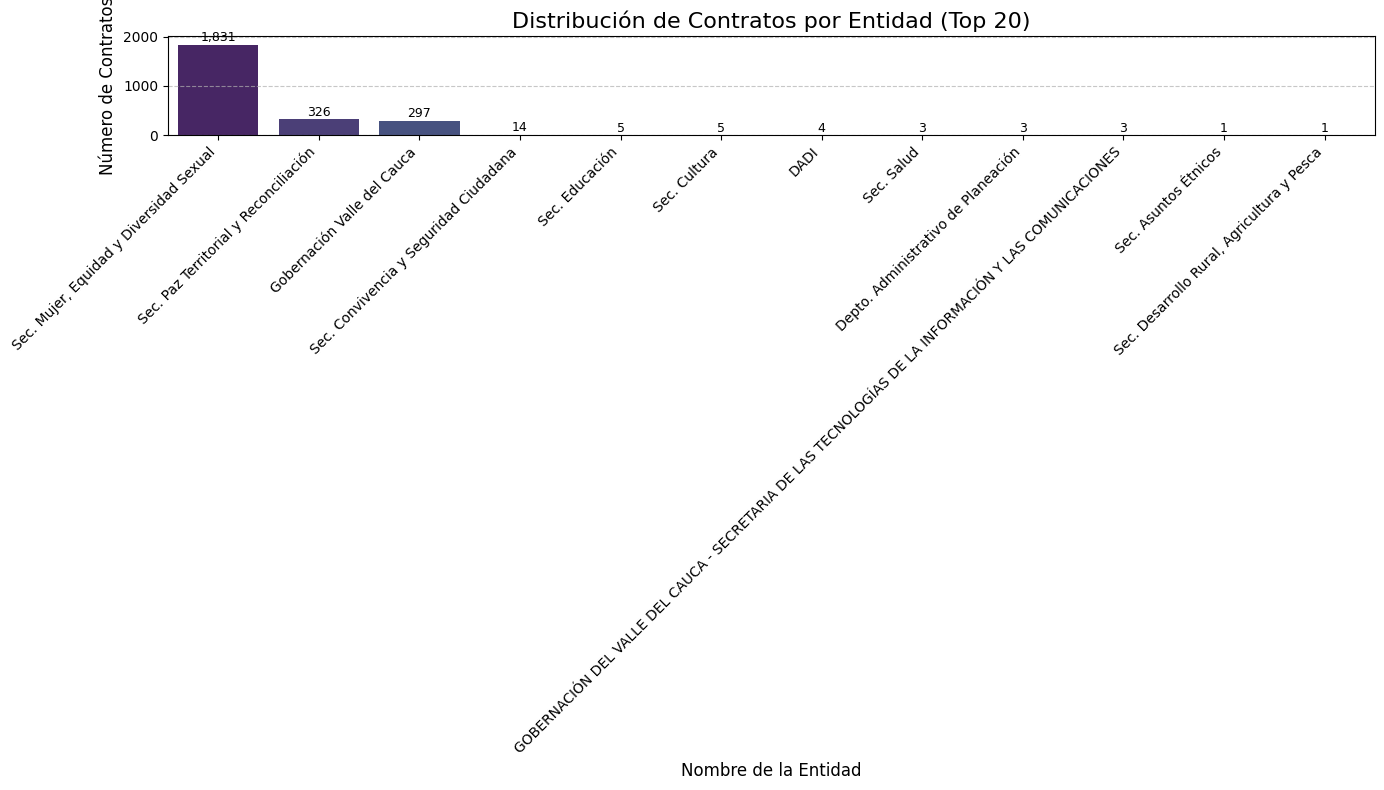


--- Paso 4 Completado ---
Análisis de entidades realizado. Listo para el siguiente paso del EDA.


In [ ]:
# --- Paso 4: Análisis Exploratorio de Datos (EDA) - Entidades ---

print("--- Paso 4: Analizando Entidades en los Contratos ---")

# Importar bibliotecas necesarias
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for potentially nicer plots
import pandas as pd # Import pandas if not already available (good practice)

# Asegurarnos de que df_contracts esté disponible del la celda anterior
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando análisis de entidades.")
    # Mostrar el número total de contratos en el DataFrame
    print(f"  → Total de contratos en el DataFrame: {df_contracts.shape[0]}")

    # Analizar la distribución de nombres de entidad específicos en este subconjunto de contratos
    # Usamos value_counts() para contar cuántos contratos hay por cada nombre de entidad ùnico
    print("\n  → Distribución de nombres de entidad:")

    # Verificar si la columna 'nombre_de_la_entidad' existe antes de usarla
    if 'nombre_de_la_entidad' in df_contracts.columns:

        # --- Acortar nombres de entidad para la gráfica ---
        print("  → Acortando nombres de entidad para la visualización...")
        # Crear un diccionario de mapeo para los nombres largos
        entity_name_mapping = {
            'GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQUIDAD DE GENERO Y DIVERSIDAD SEXUAL': 'Sec. Mujer, Equidad y Diversidad Sexual',
            'SECRETARIA DE PAZ TERRITORIAL Y RECONCILIACIÓN': 'Sec. Paz Territorial y Reconciliación',
            'VALLE DEL CAUCA - GOBERNACIÓN': 'Gobernación Valle del Cauca',
            'GOBERNACION DEL VALLE - SECRETARIA DE CONVIVENCIA Y SEGURIDAD CIUDADANA': 'Sec. Convivencia y Seguridad Ciudadana',
            'GOBERNACION DEL VALLE DEL CAUCA - SECRETARIA DE EDUCACION': 'Sec. Educación',
            'GOBERNACION DEL VALLE DEL CAUCA - DADI': 'DADI',
            'SECRETARIA DE CULTURA VALLE': 'Sec. Cultura',
            'GOBERNACIÓN VALLE DEL CAUCA -SECRETARIA DE SALUD': 'Sec. Salud',
            'GOBERNACION DEL VALLE DEL CAUCA - DEPARTAMENTO ADMINISTRATIVO DE PLANEACION': 'Depto. Administrativo de Planeación',
            'GOBERNACIÓN DEL VALLE DEL CAUCA - SECRETARÍA DE LAS TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES': 'Sec. TIC',
            'GOBERNACION DEL VALLE - SECRETARIA DE ASUNTOS ETNICOS': 'Sec. Asuntos Étnicos',
            'GOBERNACIÓN DEL VALLE DEL CAUCA - SECRETARÍA DE DESARROLLO RURAL AGRICULTURA Y PESCA': 'Sec. Desarrollo Rural, Agricultura y Pesca'
        }

        # Aplicar el mapeo a una copia de la columna para no modificar el DataFrame original si no se desea
        df_contracts['nombre_entidad_corto'] = df_contracts['nombre_de_la_entidad'].map(entity_name_mapping).fillna(df_contracts['nombre_de_la_entidad'])
        print("     ✅ Nombres de entidad acortados.")
        # --- Fin del acortamiento ---


        # Usamos la nueva columna acortada para el value_counts
        entity_distribution = df_contracts['nombre_entidad_corto'].value_counts()

        if not entity_distribution.empty:
            print("     ✅ Conteo por nombre de entidad (Acortado):")
            display(entity_distribution)

            # Mostrar un gráfico de barras para las entidades principales usando Seaborn
            if len(entity_distribution) > 1: # Solo graficar si hay más de una entidad
                 plt.figure(figsize=(14, 8)) # Adjust figure size
                 # Use seaborn's barplot for better aesthetics and color handling
                 # Plotting the top N entities
                 top_n = 20
                 # Use hue to avoid FutureWarning and ensure correct plotting
                 ax = sns.barplot(x=entity_distribution.head(top_n).index, y=entity_distribution.head(top_n).values, palette='viridis', hue=entity_distribution.head(top_n).index, legend=False) # Using a color palette

                 # Ajustar límites del eje Y para mejor visualización
                 max_count = entity_distribution.head(top_n).max()
                 ax.set_ylim(0, max_count * 1.1) # Add 10% padding above max count

                 # Añadir etiquetas de valor a las barras
                 for p in ax.patches:
                     ax.annotate(f'{int(p.get_height()):,}',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                                 textcoords='offset points')

                 plt.title(f'Distribución de Contratos por Entidad (Top {top_n})', fontsize=16)
                 plt.xlabel('Nombre de la Entidad', fontsize=12)
                 plt.ylabel('Número de Contratos', fontsize=12)
                 plt.xticks(rotation=45, ha='right', fontsize=10)
                 plt.grid(axis='y', linestyle='--', alpha=0.7) # Keep grid lines
                 plt.tight_layout() # Adjust layout to prevent labels overlapping
                 plt.show()
            elif len(entity_distribution) == 1:
                 print(f"     → Solo se encontró una entidad: {entity_distribution.index[0]} con {entity_distribution.iloc[0]} contratos.")


        else:
            print("     ⚠ï¸ No se encontraron nombres de entidad en los datos.")

    else:
        print("     ❌ La columna 'nombre_de_la_entidad' no se encontró en el DataFrame.")

else:
    print("  ⚠ï¸ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar el análisis de entidades.")


print("\n--- Paso 4 Completado ---")
print("Análisis de entidades realizado. Listo para el siguiente paso del EDA.")

--- Paso 5: Analizando el Valor de los Contratos ---
  → DataFrame 'df_contracts' encontrado. Iniciando análisis del valor del contrato.

  → Columnas de valor de contrato disponibles: ['valor_contrato']
  → Limpiando y convirtiendo columnas de valor a numérico...
     ✅ Conversión a numérico completada.
  → Creando columna unificada 'valor_final' (usando valor_contrato, si es NaN, usa cuantia_contrato)...
     → Usando solo 'valor_contrato' como 'valor_final'.

  → Estadísticas descriptivas del valor del contrato ('valor_final'):


count    2.493000e+03
mean     4.189696e+07
std      2.384973e+08
min      0.000000e+00
25%      8.360000e+06
50%      1.500000e+07
75%      2.280000e+07
max      5.170000e+09
Name: valor_final, dtype: float64


  → Número de valores faltantes en 'valor_final': 0

  → Visualizando la distribución del valor del contrato (Histograma)...


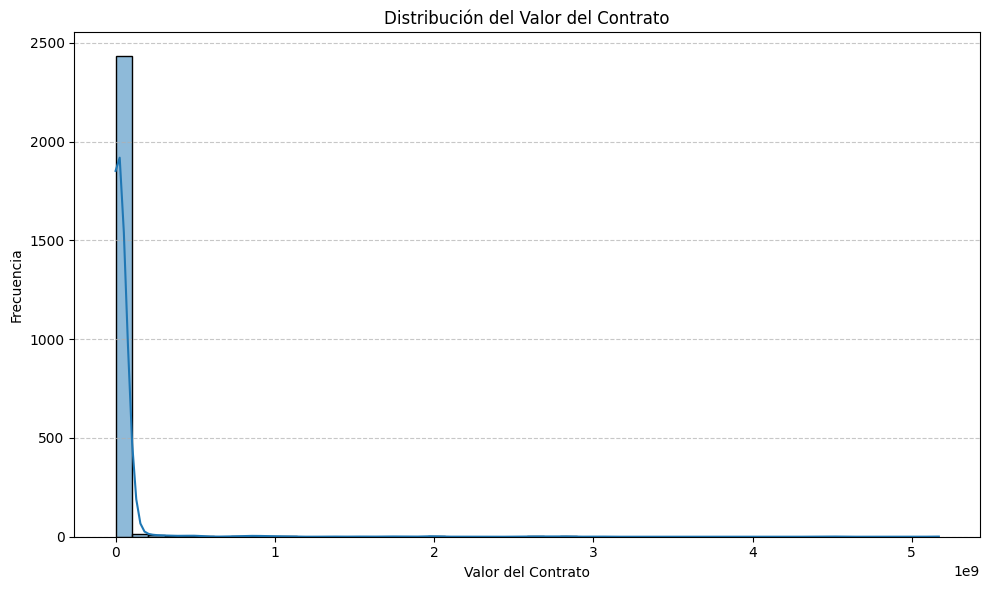


  → Visualización del valor del contrato completada.

--- División de valores de contrato en 3 rangos fijos ---

  → Rangos de valor fijos propuestos:
     - Rango Bajo: Menor a 200,000,000
     - Rango Medio: Entre 200,000,000 y 1,000,000,000
     - Rango Alto: Mayor a 1,000,000,000

  → Distribución de contratos por Rango de Valor Fijo:


Rango_Valor_Fijo
Menor a 200,000,000                  2447
Entre 200,000,000 y 1,000,000,000      28
Mayor a 1,000,000,000                  18
Name: count, dtype: int64

/tmp/ipython-input-3681588997.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=range_distribution_fijo.index, y=range_distribution_fijo.values, palette='viridis')


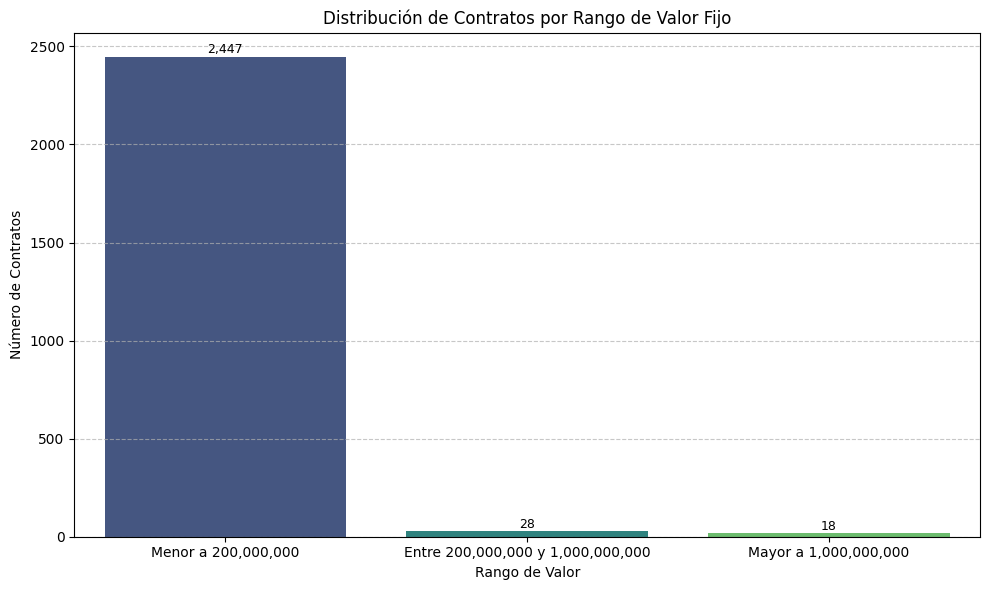


--- Paso 5 Completado ---
Análisis del valor de los contratos (incluyendo rangos fijos) realizado. Listo para el siguiente paso del EDA.


In [ ]:
# --- Paso 5: Análisis Exploratorio de Datos (EDA) - Valor del Contrato ---

print("--- Paso 5: Analizando el Valor de los Contratos ---")

# Importar bibliotecas necesarias (Asegurarnos de que estén importadas)
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for potentially nicer plots
import pandas as pd # Import pandas if not already available (good practice)


# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando análisis del valor del contrato.")

    # Identificar las columnas relevantes para el valor del contrato
    # Tenemos 'valor_contrato' y 'cuantia_contrato'
    value_columns = ['valor_contrato', 'cuantia_contrato']
    available_value_columns = [col for col in value_columns if col in df_contracts.columns]

    if available_value_columns:
        print(f"\n  → Columnas de valor de contrato disponibles: {available_value_columns}")

        # Limpieza y preparación: Convertir las columnas de valor a tipo numérico
        # Usamos pd.to_numeric con errors='coerce' para convertir valores no numéricos a NaN
        print("  → Limpiando y convirtiendo columnas de valor a numérico...")
        for col in available_value_columns:
            # Reemplazar comas o puntos como separadores de miles si existen (comùn en datos latinoamericanos)
            if df_contracts[col].dtype == 'object':
                 try:
                     # Intentar convertir a string y limpiar caracteres no numéricos comunes (, .)
                     df_contracts[col] = df_contracts[col].astype(str).str.replace('[$,.]', '', regex=True)
                 except Exception as e:
                     print(f"     ⚠ï¸ No se pudo realizar limpieza inicial de caracteres en '{col}': {e}")

            df_contracts[col] = pd.to_numeric(df_contracts[col], errors='coerce')

        print("     ✅ Conversión a numérico completada.")

        # Combinar columnas de valor si es necesario (por ejemplo, usar cuantia_contrato if valor_contrato es NaN)
        # Para este análisis, podemos crear una columna unificada 'valor_final'
        print("  → Creando columna unificada 'valor_final' (usando valor_contrato, si es NaN, usa cuantia_contrato)...")
        if 'valor_contrato' in df_contracts.columns and 'cuantia_contrato' in df_contracts.columns:
             df_contracts['valor_final'] = df_contracts['valor_contrato'].fillna(df_contracts['cuantia_contrato'])
             print("     ✅ Columna 'valor_final' creada combinando 'valor_contrato' y 'cuantia_contrato'.")
        elif 'valor_contrato' in df_contracts.columns:
             df_contracts['valor_final'] = df_contracts['valor_contrato']
             print("     → Usando solo 'valor_contrato' como 'valor_final'.")
        elif 'cuantia_contrato' in df_contracts.columns:
             df_contracts['valor_final'] = df_contracts['cuantia_contrato']
             print("     → Usando solo 'cuantia_contrato' como 'valor_final'.")
        else:
             print("     ❌ No se pudo crear columna 'valor_final'. No hay columnas de valor disponibles.")
             valor_analysis_possible = False


        if 'valor_final' in df_contracts.columns:
            valor_analysis_possible = True
            # --- Estadísticas descriptivas del valor del contrato ---
            print("\n  → Estadísticas descriptivas del valor del contrato ('valor_final'):")
            display(df_contracts['valor_final'].describe())

            # --- Análisis de valores faltantes en la columna final ---
            missing_values_count = df_contracts['valor_final'].isnull().sum()
            print(f"\n  → Número de valores faltantes en 'valor_final': {missing_values_count}")
            if missing_values_count > 0:
                 print("     ⚠ï¸ Hay valores faltantes en la columna de valor final después de la combinación.")

            # --- Visualización: Histograma del valor del contrato ---
            print("\n  → Visualizando la distribución del valor del contrato (Histograma)...")

            # Eliminar valores nulos y valores negativos (si los hay y no tienen sentido)
            df_valor_no_null = df_contracts['valor_final'].dropna()
            df_valor_positive = df_valor_no_null[df_valor_no_null >= 0] # Consider only non-negative values

            if not df_valor_positive.empty:
                plt.figure(figsize=(10, 6))
                sns.histplot(df_valor_positive, bins=50, kde=True)
                plt.title('Distribución del Valor del Contrato')
                plt.xlabel('Valor del Contrato')
                plt.ylabel('Frecuencia')
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()

                print("\n  → Visualización del valor del contrato completada.")

                # --- División en rangos fijos y análisis de distribución ---
                print("\n--- División de valores de contrato en 3 rangos fijos ---")

                # Definir los rangos fijos en millones (200M, 1000M)
                rango_bajo_max = 200_000_000 # 200 millones
                rango_medio_max = 1_000_000_000 # 1000 millones (1 billon)

                # Definir los bordes de los rangos
                # Usamos rangos semi-abiertos: (inicio, fin]
                # El primer bin va desde 0 hasta rango_bajo_max
                # El segundo bin va desde rango_bajo_max hasta rango_medio_max
                # El tercer bin va desde rango_medio_max hasta el valor maximo (o infinito)
                bins = [0, rango_bajo_max, rango_medio_max, df_valor_positive.max() if not df_valor_positive.empty else 0]
                # Ajustamos los bins si el max_val es menor que los límites definidos
                bins = [b for b in bins if b >= 0] # Ensure bins are non-negative
                bins = sorted(list(set(bins))) # Sort and get unique bins

                # Definir las etiquetas para cada rango
                # Asegurarnos de que el número de etiquetas coincida con el número de bins - 1
                labels = [f'Menor a {rango_bajo_max:,.0f}',
                          f'Entre {rango_bajo_max:,.0f} y {rango_medio_max:,.0f}',
                          f'Mayor a {rango_medio_max:,.0f}']

                # Ajustar etiquetas si los bins no resultan en 3 rangos debido a los datos
                if len(bins) - 1 != len(labels):
                     print(f"     ⚠ï¸ Advertencia: Los datos no cubren todos los rangos definidos. Bins resultantes: {bins}. Etiquetas: {labels}")
                     # Recalculate labels based on actual bins if needed, or use default cut labels
                     labels = [f'({bins[i]:,.0f} - {bins[i+1]:,.0f}]' for i in range(len(bins)-1)]


                print(f"\n  → Rangos de valor fijos propuestos:")
                print(f"     - Rango Bajo: Menor a {rango_bajo_max:,.0f}")
                print(f"     - Rango Medio: Entre {rango_bajo_max:,.0f} y {rango_medio_max:,.0f}")
                print(f"     - Rango Alto: Mayor a {rango_medio_max:,.0f}")


                # Crear una nueva columna categórica basada en los rangos
                # Usamos exclude_lowest=True para el primer bin (0, 200M], así "Menor a 200M" incluye 0 pero no 200M si es exacto
                # Si queremos "Menor a 200M" estrictamente menor, el primer bin deberia ser [-inf, 200M)
                # Pero para valores de contrato 0 es un punto de inicio valido.
                # Usaremos right=False para (inicio, fin), o right=True para (inicio, fin]
                # Usemos right=True e include_lowest=True para (inicio, fin] incluyendo el 0
                df_contracts['Rango_Valor_Fijo'] = pd.cut(df_contracts['valor_final'], bins=bins, labels=labels[:len(bins)-1], right=True, include_lowest=True)


                print("\n  → Distribución de contratos por Rango de Valor Fijo:")
                # Contar la distribución de contratos en cada rango
                # Rellenar posibles categorías faltantes si no hay contratos en un rango específico
                range_distribution_fijo = df_contracts['Rango_Valor_Fijo'].value_counts().reindex(labels[:len(bins)-1]).fillna(0)

                if not range_distribution_fijo.empty or len(labels[:len(bins)-1]) > 0:
                    display(range_distribution_fijo)

                    # Opcional: Visualizar la distribución por rangos fijos en un gráfico de barras
                    plt.figure(figsize=(10, 6))
                    ax = sns.barplot(x=range_distribution_fijo.index, y=range_distribution_fijo.values, palette='viridis')
                    plt.title('Distribución de Contratos por Rango de Valor Fijo')
                    plt.xlabel('Rango de Valor')
                    plt.ylabel('Número de Contratos')
                    plt.xticks(rotation=0) # No rotar etiquetas si son cortas
                    plt.grid(axis='y', linestyle='--', alpha=0.7)
                    plt.tight_layout()

                    # Add labels to the bars
                    for p in ax.patches:
                        ax.annotate(f'{int(p.get_height()):,}',
                                    (p.get_x() + p.get_width() / 2., p.get_height()),
                                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                                    textcoords='offset points')

                    plt.show()
                else:
                     print("     ⚠ï¸ No se pudo calcular la distribución por rangos fijos.")


            else:
                 print("     ⚠ï¸ No hay datos de valor válidos para visualizar o dividir en rangos.")

        else:
             valor_analysis_possible = False
             print("     ❌ No se pudo realizar el análisis de valor sin una columna 'valor_final'.")


    else:
        print("  ⚠ï¸ No se encontraron columnas de valor de contrato ('valor_contrato', 'cuantia_contrato') en el DataFrame.")
        valor_analysis_possible = False

else:
    print("  ⚠ï¸ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar el análisis de valor del contrato.")
    valor_analysis_possible = False


if valor_analysis_possible:
    print("\n--- Paso 5 Completado ---")
    print("Análisis del valor de los contratos (incluyendo rangos fijos) realizado. Listo para el siguiente paso del EDA.")
else:
    print("\n--- Paso 5 Omitido/Fallido ---")
    print("El análisis del valor de los contratos no pudo completarse debido a datos o columnas faltantes/inválidas.")

## Análisis de Duplicados

### Subtask:
Identificar y reportar la cantidad de filas duplicadas en el DataFrame. Si se encuentran duplicados, se pueden decidir pasos adicionales como eliminarlos o investigarlos más a fondo.

In [ ]:
# --- Análisis de Duplicados en el DataFrame (Comparando columnas específicas incluyendo el Año) ---

print("--- Analizando Duplicados en el DataFrame (comparando 'valor_contrato', 'numero_del_contrato' y Año) ---")

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if ('df_contracts' in locals() and not df_contracts.empty and
    'valor_final' in df_contracts.columns and
    'numero_del_contrato' in df_contracts.columns):

    print("  → DataFrame 'df_contracts', 'valor_final' y 'numero_del_contrato' encontrados. Procediendo a analizar duplicados incluyendo el año.")

    # Identificar la columna de fecha relevante
    date_column = None
    if 'fecha_de_firma_del_contrato' in df_contracts.columns:
        date_column = 'fecha_de_firma_del_contrato'
    elif 'fecha_inicio_ejecuci_n' in df_contracts.columns:
        date_column = 'fecha_inicio_ejecuci_n'

    if date_column:
        print(f"  → Usando '{date_column}' para extraer el año.")

        # Asegurarnos de que la columna de fecha sea datetime (si no lo es ya)
        df_contracts[date_column] = pd.to_datetime(df_contracts[date_column], errors='coerce')

        # Eliminar filas con valores nulos en las columnas clave antes de verificar duplicados
        df_cleaned_for_duplicate_check = df_contracts.dropna(subset=['valor_final', 'numero_del_contrato', date_column]).copy()
        df_cleaned_for_duplicate_check = df_cleaned_for_duplicate_check[df_cleaned_for_duplicate_check['valor_final'] >= 0] # Consider only non-negative values

        if not df_cleaned_for_duplicate_check.empty:
            # Extraer el año en una nueva columna temporal para la verificación
            df_cleaned_for_duplicate_check['Año_Contrato'] = df_cleaned_for_duplicate_check[date_column].dt.year

            # Identificar filas duplicadas basándose en 'valor_final', 'numero_del_contrato' y 'Año_Contrato'
            duplicate_rows_refined = df_cleaned_for_duplicate_check.duplicated(subset=['valor_final', 'numero_del_contrato', 'Año_Contrato'], keep=False)

            # Contar el número total de filas duplicadas (basado en estos criterios refinados)
            num_duplicate_rows_refined = duplicate_rows_refined.sum()

            print(f"\n  → Número total de filas duplicadas (basado en 'valor_final', 'numero_del_contrato' y Año, contando todas las instancias): {num_duplicate_rows_refined}")

            if num_duplicate_rows_refined > 0:
                print("  ⚠️ Se encontraron registros duplicados basados en 'valor_final', 'numero_del_contrato' y Año.")

                # Filtrar el DataFrame para mostrar solo las filas que son duplicadas (según los criterios refinados)
                df_duplicates_refined = df_cleaned_for_duplicate_check[duplicate_rows_refined].copy()

                # Ordenar el DataFrame de duplicados refinado por las columnas clave para agruparlos
                df_duplicates_refined_sorted = df_duplicates_refined.sort_values(by=['valor_final', 'numero_del_contrato', 'Año_Contrato'])

                print("\n  → Mostrando las primeras 100 filas duplicadas (ordenadas por valor, número de contrato y Año):")
                # Mostrar las primeras 100 filas del DataFrame de duplicados refinado y ordenado
                display(df_duplicates_refined_sorted.head(100))

                # Opcional: Mostrar cuántos registros únicos habría si se eliminaran duplicados (en base a estos criterios refinados)
                num_unique_rows_refined = df_cleaned_for_duplicate_check.shape[0] - df_cleaned_for_duplicate_check.duplicated(subset=['valor_final', 'numero_del_contrato', 'Año_Contrato']).sum()
                print(f"\n  → Si se eliminaran los duplicados (manteniendo la primera aparición basada en 'valor_final', 'numero_del_contrato' y Año), quedarían {df_cleaned_for_duplicate_check.duplicated(subset=['valor_final', 'numero_del_contrato', 'Año_Contrato']).sum()} filas duplicadas y {num_unique_rows_refined} filas únicas.")

                # Puedes decidir cómo manejar los duplicados aquí si es necesario.
                # Por ejemplo, para eliminar duplicados basados en estos criterios y actualizar el DataFrame:
                # df_contracts_cleaned_refined = df_cleaned_for_duplicate_check.drop_duplicates(subset=['valor_final', 'numero_del_contrato', 'Año_Contrato']).copy()
                # print("  ✅ Duplicados eliminados (basado en 'valor_final', 'numero_del_contrato' y Año). Nuevo tamaño del DataFrame:", df_contracts_cleaned_refined.shape)
                # df_contracts = df_contracts_cleaned_refined # Opcional: Sobreescribir el DataFrame original


            else:
                print("  ✅ No se encontraron registros duplicados basados en 'valor_final', 'numero_del_contrato' y Año en el DataFrame.")

        else:
             print("  ⚠️ No hay suficientes datos válidos (sin nulos en columnas clave o valores negativos) para realizar el análisis de duplicados con el año.")


    else:
        print("  ❌ No se encontró una columna de fecha relevante ('fecha_de_firma_del_contrato' o 'fecha_inicio_ejecuci_n') en el DataFrame. No se puede incluir el Año en el análisis de duplicados.")


elif 'df_contracts' not in locals() or df_contracts.empty:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede analizar duplicados.")
elif 'valor_final' not in df_contracts.columns or 'numero_del_contrato' not in df_contracts.columns:
    missing_cols = [col for col in ['valor_final', 'numero_del_contrato'] if col not in df_contracts.columns]
    print(f"  ❌ Faltan las columnas necesarias para el análisis de duplicados: {missing_cols}. No se puede analizar duplicados.")


print("\n--- Análisis de Duplicados Completado ---")

--- Analizando Duplicados en el DataFrame (comparando 'valor_contrato', 'numero_del_contrato' y Año) ---
  → DataFrame 'df_contracts', 'valor_final' y 'numero_del_contrato' encontrados. Procediendo a analizar duplicados incluyendo el año.
  → Usando 'fecha_de_firma_del_contrato' para extraer el año.

  → Número total de filas duplicadas (basado en 'valor_final', 'numero_del_contrato' y Año, contando todas las instancias): 2462
  ⚠️ Se encontraron registros duplicados basados en 'valor_final', 'numero_del_contrato' y Año.

  → Mostrando las primeras 100 filas duplicadas (ordenadas por valor, número de contrato y Año):


nivel_entidad codigo_entidad_en_secop  \
2716   TERRITORIAL               276000001   
3427   TERRITORIAL               276000001   
2319   Territorial               709888572   
3537   Territorial               709888572   
937       Nacional               709416515   
...            ...                     ...   
1513      Nacional               709416515   
2464      Nacional               709416515   
3690      Nacional               709416515   
2430      Nacional               709416515   
3673      Nacional               709416515   

                                   nombre_de_la_entidad nit_de_la_entidad  \
2716                      VALLE DEL CAUCA - GOBERNACIÓN         890399029   
3427                      VALLE DEL CAUCA - GOBERNACIÓN         890399029   
2319     SECRETARIA DE PAZ TERRITORIAL Y RECONCILIACIÓN         890399029   
3537     SECRETARIA DE PAZ TERRITORIAL Y RECONCILIACIÓN         890399029   
937   GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
...                                                 ...               ...   
1513  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
2464  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
3690  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
2430  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   
3673  GOBERNACION DEL VALLE- SECRETARIA DE MUJER EQU...         890399029   

     departamento_entidad municipio_entidad estado_del_proceso  \
2716      Valle del Cauca              Cali          Celebrado   
3427      Valle del Cauca              Cali          Celebrado   
2319      Valle del Cauca              Cali       En ejecución   
3537      Valle del Cauca              Cali       En ejecución   
937       Valle del Cauca              Cali         Modificado   
...                   ...               ...                ...   
1513      Valle del Cauca              Cali            Cerrado   
2464      Valle del Cauca              Cali            Cerrado   
3690      Valle del Cauca              Cali            Cerrado   
2430      Valle del Cauca              Cali            Cerrado   
3673      Valle del Cauca              Cali            Cerrado   

                        modalidad_de_contrataci_n  \
2716  Contratos y convenios con más de dos partes   
3427  Contratos y convenios con más de dos partes   
2319                Contratación régimen especial   
3537                Contratación régimen especial   
937                          Contratación directa   
...                                           ...   
1513                         Contratación directa   
2464                         Contratación directa   
3690                         Contratación directa   
2430                         Contratación directa   
3673                         Contratación directa   

                                     objeto_a_contratar  \
2716  AUNAR ESFUERZOS ENTRE LA FISCALIA GENERAL DE L...   
3427  AUNAR ESFUERZOS ENTRE LA FISCALIA GENERAL DE L...   
2319  AUNAR ESFUERZOS PARA EL FORTALECIMIENTO DE LA ...   
3537  AUNAR ESFUERZOS PARA EL FORTALECIMIENTO DE LA ...   
937   AUNAR ESFUERZOS ENTRE LA SECRETARÍA DE MUJER E...   
...                                                 ...   
1513  PRESTAR LOS SERVICIOS DE APOYO A LA GESTIÓN EN...   
2464  PRESTAR LOS SERVICIOS DE APOYO A LA GESTIÓN EN...   
3690  PRESTAR LOS SERVICIOS DE APOYO A LA GESTIÓN EN...   
2430  PRESTAR LOS SERVICIOS DE APOYO A LA GESTIÓN EN...   
3673  PRESTAR LOS SERVICIOS DE APOYO A LA GESTIÓN EN...   

                                     objeto_del_proceso  ... valor_contrato  \
2716  AUNAR ESFUERZOS ENTRE LA FISCALIA GENERAL DE L...  ...              0   
3427  AUNAR ESFUERZOS ENTRE LA FISCALIA GENERAL DE L...  ...              0   
2319  AUNAR ESFUERZOS PARA EL FORTALECIMIENTO DE LA ...  ...              0   
3537  AUNAR ESFUERZOS PARA EL FORTALECIMIENTO DE LA ...  ...            


  → Si se eliminaran los duplicados (manteniendo la primera aparición basada en 'valor_final', 'numero_del_contrato' y Año), quedarían 1325 filas duplicadas y 2493 filas únicas.

--- Análisis de Duplicados Completado ---


In [ ]:
# --- Eliminar Registros Duplicados ---

print("--- Eliminando Registros Duplicados ---")

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if ('df_contracts' in locals() and not df_contracts.empty and
    'valor_final' in df_contracts.columns and
    'numero_del_contrato' in df_contracts.columns):

    print("  → DataFrame 'df_contracts' y columnas 'valor_final', 'numero_del_contrato' encontrados. Procediendo a eliminar duplicados.")

    # Identificar la columna de fecha relevante
    date_column = None
    if 'fecha_de_firma_del_contrato' in df_contracts.columns:
        date_column = 'fecha_de_firma_del_contrato'
    elif 'fecha_inicio_ejecuci_n' in df_contracts.columns:
        date_column = 'fecha_inicio_ejecuci_n'

    if date_column:
        print(f"  → Usando '{date_column}' para extraer el año y eliminar duplicados.")

        # Asegurarnos de que la columna de fecha sea datetime (si no lo es ya)
        # Es importante hacer esto antes de extraer el año
        df_contracts[date_column] = pd.to_datetime(df_contracts[date_column], errors='coerce')

        # Crear una copia temporal para trabajar con datos limpios para la deduplicación
        # Esto evita modificar el DataFrame mientras se itera o se hace subsetting antes de la eliminación final
        df_temp_for_dedup = df_contracts.dropna(subset=['valor_final', 'numero_del_contrato', date_column]).copy()
        df_temp_for_dedup = df_temp_for_dedup[df_temp_for_dedup['valor_final'] >= 0] # Consider only non-negative values

        if not df_temp_for_dedup.empty:
            # Extraer el año en una nueva columna temporal para la verificación
            df_temp_for_dedup['Año_Contrato'] = df_temp_for_dedup[date_column].dt.year

            # Eliminar duplicados basándose en 'valor_final', 'numero_del_contrato' y 'Año_Contrato'
            # Por defecto, keep='first' mantiene la primera aparición
            df_contracts_cleaned = df_temp_for_dedup.drop_duplicates(subset=['valor_final', 'numero_del_contrato', 'Año_Contrato']).copy()

            # Opcional: Si quieres reemplazar el DataFrame original con el limpio
            # Asegúrate de que las columnas originales y sus tipos se mantengan si es necesario
            # Para simplificar, podemos simplemente reemplazar df_contracts si eso es lo deseado para análisis posteriores
            # Sin embargo, para no perder el DataFrame original por si acaso, podemos crear una nueva variable
            # O bien, actualizar el DataFrame original de forma segura
            # Vamos a crear una nueva variable para el DataFrame limpio y reportar el cambio.

            original_rows = df_contracts.shape[0]
            cleaned_rows = df_contracts_cleaned.shape[0]
            rows_removed = original_rows - cleaned_rows

            print(f"\n  ✅ Duplicados eliminados (basado en 'valor_final', 'numero_del_contrato' y Año).")
            print(f"     - Filas originales: {original_rows}")
            print(f"     - Filas después de eliminar duplicados: {cleaned_rows}")
            print(f"     - Filas eliminadas: {rows_removed}")

            # Puedes asignar el DataFrame limpio de vuelta a df_contracts si lo necesitas para pasos posteriores
            # df_contracts = df_contracts_cleaned.copy() # Usa copy() para evitar SettingWithCopyWarning si sigues modificando

            # Para propósitos de este ejemplo, solo mostraremos la información del DataFrame limpio.
            # Si necesitas usar este DataFrame limpio en celdas posteriores, deberías asignarlo a df_contracts
            print("\n  → Información del DataFrame después de eliminar duplicados (temporalmente en df_contracts_cleaned):")
            df_contracts_cleaned.info()

            # Si el usuario confirma, se puede añadir una celda para reasignar df_contracts = df_contracts_cleaned


        else:
             print("  ⚠️ No hay suficientes datos válidos (sin nulos en columnas clave o valores negativos) para realizar la eliminación de duplicados con el año.")


    else:
        print("  ❌ No se encontró una columna de fecha relevante ('fecha_de_firma_del_contrato' o 'fecha_inicio_ejecuci_n') en el DataFrame. No se puede eliminar duplicados incluyendo el Año.")


elif 'df_contracts' not in locals() or df_contracts.empty:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede eliminar duplicados.")
elif 'valor_final' not in df_contracts.columns or 'numero_del_contrato' not in df_contracts.columns:
    missing_cols = [col for col in ['valor_final', 'numero_del_contrato'] if col not in df_contracts.columns]
    print(f"  ❌ Faltan las columnas necesarias para eliminar duplicados: {missing_cols}. No se puede eliminar duplicados.")


print("\n--- Eliminación de Duplicados Completada ---")

--- Eliminando Registros Duplicados ---
  → DataFrame 'df_contracts' y columnas 'valor_final', 'numero_del_contrato' encontrados. Procediendo a eliminar duplicados.
  → Usando 'fecha_de_firma_del_contrato' para extraer el año y eliminar duplicados.

  ✅ Duplicados eliminados (basado en 'valor_final', 'numero_del_contrato' y Año).
     - Filas originales: 3837
     - Filas después de eliminar duplicados: 2493
     - Filas eliminadas: 1344

  → Información del DataFrame después de eliminar duplicados (temporalmente en df_contracts_cleaned):
<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 3836
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   nivel_entidad                2493 non-null   object        
 1   codigo_entidad_en_secop      2493 non-null   object        
 2   nombre_de_la_entidad         2493 non-null   object        
 3   nit_de_la_entidad      

In [ ]:
# --- Actualizar el DataFrame principal con los datos limpios ---

print("--- Actualizando df_contracts con los datos limpios ---")

# Asegurarnos de que df_contracts_cleaned esté disponible
if 'df_contracts_cleaned' in locals():
    df_contracts = df_contracts_cleaned.copy() # Usamos .copy() para evitar SettingWithCopyWarning
    print("  ✅ DataFrame 'df_contracts' actualizado con los datos limpios.")
    print("\n  → Información del DataFrame actualizado:")
    df_contracts.info()
else:
    print("  ⚠️ No se encontró el DataFrame limpio 'df_contracts_cleaned'. No se pudo actualizar df_contracts.")

print("\n--- Actualización Completada ---")

--- Actualizando df_contracts con los datos limpios ---
  ✅ DataFrame 'df_contracts' actualizado con los datos limpios.

  → Información del DataFrame actualizado:
<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 3836
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   nivel_entidad                2493 non-null   object        
 1   codigo_entidad_en_secop      2493 non-null   object        
 2   nombre_de_la_entidad         2493 non-null   object        
 3   nit_de_la_entidad            2493 non-null   object        
 4   departamento_entidad         2493 non-null   object        
 5   municipio_entidad            2493 non-null   object        
 6   estado_del_proceso           2493 non-null   object        
 7   modalidad_de_contrataci_n    2493 non-null   object        
 8   objeto_a_contratar           2493 non-null   object        
 9   objeto_del_pro

--- Analizando Línea de Tiempo del Valor de los Contratos por Año y Puntos por Mes ---
  → DataFrame 'df_contracts' encontrado. Iniciando análisis de línea de tiempo.

  → Usando 'fecha_de_firma_del_contrato' para la línea de tiempo y 'valor_final' para el valor.
  → Convirtiendo columna de fecha a formato datetime...
     ✅ Conversión a datetime completada.

--- Análisis de Valor Total por Año ---
  → Extrayendo el año de la columna de fecha...
     ✅ Año extraído.
  → Agrupando por año y sumando el valor de los contratos...
     ✅ Suma por año calculada.


Año
2008      108417277
2009      440243750
2010     2780248000
2012       50940000
2013      179000000
2014       75600000
2016     1881569600
2017     1255305000
2018     3422653600
2019     3617840351
2020     7399240620
2021    14451180000
2022    19692902042
2023    18588393981
2024    15964023044
2025    14541554500
Name: valor_final, dtype: int64


  → Visualizando la suma total del valor de los contratos por año...


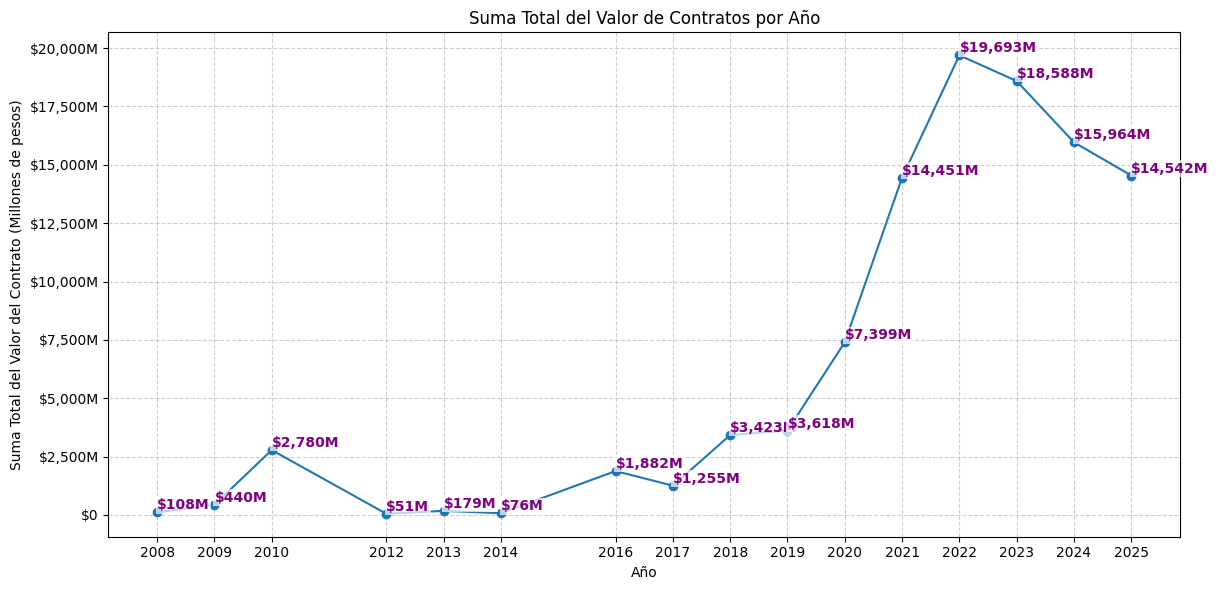


  → Visualización de la línea de tiempo por año completada.

--- Análisis y Visualización: Nube de Puntos por Valor vs. Fecha (Mes) ---
  → Creando columna 'Año-Mes' para la visualización de nube de puntos...
     ✅ Columna 'Año-Mes_str' creada.

  → Visualizando Nube de Puntos (Valor del Contrato vs. Año-Mes)...


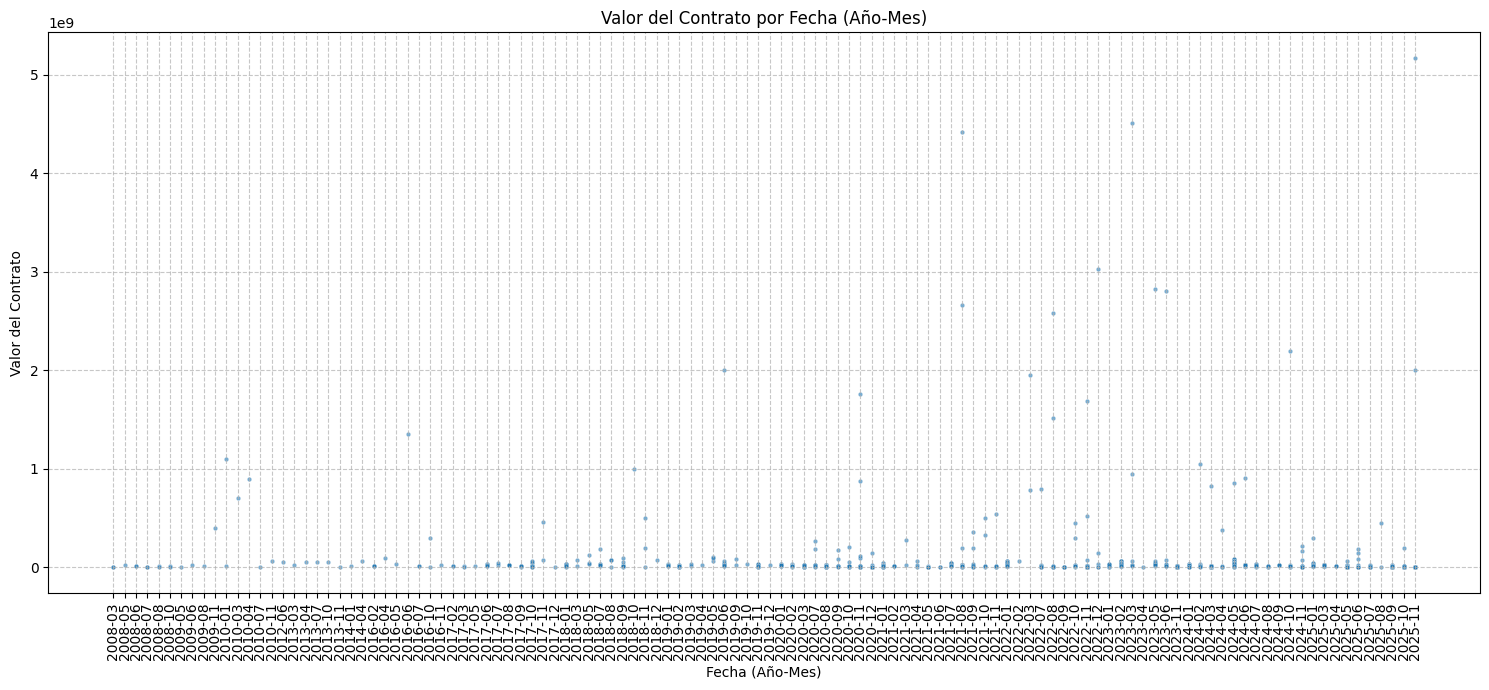

     ✅ Visualización de Nube de Puntos completada.

--- Análisis de Línea de Tiempo y Nube de Puntos Completado ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter # Import FuncFormatter

print("--- Analizando Línea de Tiempo del Valor de los Contratos por Año y Puntos por Mes ---")

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando análisis de línea de tiempo.")

    # Identificar la columna de fecha relevante (usaremos fecha_de_firma_del_contrato como prioridad)
    date_column = None
    if 'fecha_de_firma_del_contrato' in df_contracts.columns:
        date_column = 'fecha_de_firma_del_contrato'
    elif 'fecha_inicio_ejecuci_n' in df_contracts.columns: # Fallback if firma date is not available
        date_column = 'fecha_inicio_ejecuci_n'

    # Asegurarnos de que la columna de valor final esté disponible y sea numérica
    if 'valor_final' in df_contracts.columns:
         value_column = 'valor_final'
         value_analysis_possible = True
    else:
         print("  ⚠️ Columna 'valor_final' no encontrada. No se puede realizar el análisis de línea de tiempo por valor.")
         value_analysis_possible = False


    if date_column and value_analysis_possible:
        print(f"\n  → Usando '{date_column}' para la línea de tiempo y '{value_column}' para el valor.")

        # Limpieza y preparación: Convertir la columna de fecha a datetime
        print("  → Convirtiendo columna de fecha a formato datetime...")
        # Usamos errors='coerce' para convertir fechas no parseables a NaT (Not a Time)
        df_contracts[date_column] = pd.to_datetime(df_contracts[date_column], errors='coerce')
        print("     ✅ Conversión a datetime completada.")

        # Eliminar filas donde la fecha o el valor final son nulos o inválidos para este análisis de tiempo
        df_time_series = df_contracts.dropna(subset=[date_column, value_column]).copy()

        if not df_time_series.empty:

            # --- Análisis de valor total por Año ---
            print("\n--- Análisis de Valor Total por Año ---")

            # Extraer el año de la fecha
            print("  → Extrayendo el año de la columna de fecha...")
            df_time_series['Año'] = df_time_series[date_column].dt.year
            print("     ✅ Año extraído.")

            # Agrupar por año y sumar el valor final
            print("  → Agrupando por año y sumando el valor de los contratos...")
            yearly_value_sum = df_time_series.groupby('Año')[value_column].sum()
            print("     ✅ Suma por año calculada.")
            display(yearly_value_sum)

            # --- Visualización: Línea de tiempo del valor total por año ---
            print("\n  → Visualizando la suma total del valor de los contratos por año...")

            if not yearly_value_sum.empty:
                plt.figure(figsize=(12, 6))
                # Usar un gráfico de línea
                ax = yearly_value_sum.plot(kind='line', marker='o') # marker='o' para puntos en cada año

                # Formatear el eje Y con miles/millones/mil millones y símbolo de moneda
                def currency_formatter(x, pos):
                    if x >= 1e9: # Mil millones
                        return f'${x*1e-6:,.0f}M' # Mostrar como miles de millones con sufijo M (e.g., 14.000M)
                    elif x >= 1e6: # Millones
                        return f'${x*1e-6:,.0f}M'
                    else: # Miles/Unidades
                        return f'${x:,.0f}'

                formatter = FuncFormatter(currency_formatter)
                ax.yaxis.set_major_formatter(formatter)

                plt.title('Suma Total del Valor de Contratos por Año')
                plt.xlabel('Año')
                plt.ylabel('Suma Total del Valor del Contrato (Millones de pesos)') # Clarificar el eje Y
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.xticks(yearly_value_sum.index) # Asegurar que se muestren todos los años como ticks
                plt.tight_layout()

                # Añadir etiquetas de texto a cada punto
                for year, value in yearly_value_sum.items():
                    label_text = currency_formatter(value, None) # Usar el mismo formateador para la etiqueta
                    plt.text(year, value, label_text,
                             fontweight='bold', fontsize=10, color='purple', # Cambiar color a morado
                             ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

                plt.show()

                print("\n  → Visualización de la línea de tiempo por año completada.")

            else:
                 print("     ⚠️ No hay datos de valor por año para visualizar.")

            # --- Análisis y Visualización: Nube de Puntos por Valor vs. Fecha (Mes) ---
            print("\n--- Análisis y Visualización: Nube de Puntos por Valor vs. Fecha (Mes) ---")

            if not df_time_series.empty:
                 # Extraer el Año-Mes para el eje X
                 print("  → Creando columna 'Año-Mes' para la visualización de nube de puntos...")
                 df_time_series['Año-Mes'] = df_time_series[date_column].dt.to_period('M')
                 # Convertir a string para asegurar el ordenamiento en el eje X del gráfico
                 df_time_series['Año-Mes_str'] = df_time_series['Año-Mes'].astype(str)
                 print("     ✅ Columna 'Año-Mes_str' creada.")

                 # Ordenar por fecha para asegurar un orden correcto en el eje X
                 df_time_series_sorted = df_time_series.sort_values(by=date_column).copy()

                 print("\n  → Visualizando Nube de Puntos (Valor del Contrato vs. Año-Mes)...")

                 plt.figure(figsize=(15, 7)) # Ajustar tamaño para mejor visualización de puntos
                 sns.scatterplot(data=df_time_series_sorted, x='Año-Mes_str', y=value_column, alpha=0.6, s=10) # Ajustar transparencia (alpha) y tamaño de punto (s)

                 plt.title('Valor del Contrato por Fecha (Año-Mes)')
                 plt.xlabel('Fecha (Año-Mes)')
                 plt.ylabel('Valor del Contrato')
                 plt.xticks(rotation=90) # Rotar etiquetas para evitar superposición
                 plt.grid(True, linestyle='--', alpha=0.7)
                 plt.tight_layout()
                 plt.show()
                 print("     ✅ Visualización de Nube de Puntos completada.")


            else:
                 print("     ⚠️ No hay datos válidos (fecha y valor no nulos) para el análisis de nube de puntos.")


        else:
            print("  ⚠️ No hay datos válidos (fecha y valor no nulos) para el análisis de línea de tiempo o nube de puntos.")


    elif not date_column:
        print("  ⚠️ No se encontró una columna de fecha relevante ('fecha_de_firma_del_contrato' o 'fecha_inicio_ejecuci_n') en el DataFrame.")
    # else (value_analysis_possible was False) handled above


else:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar el análisis de línea de tiempo o nube de puntos.")


print("\n--- Análisis de Línea de Tiempo y Nube de Puntos Completado ---")

--- Paso 6: Analizando Tipos de Contrato y Modalidades de Selección ---
  → DataFrame 'df_contracts' encontrado. Iniciando análisis.

  → Analizando Tipos de Contrato...
  → Unificando variaciones en la columna 'tipo_de_contrato'...
     ✅ Unificación de nombres de tipo de contrato completada.
     ✅ Distribución de 'tipo_de_contrato' (Después de unificación):


tipo_de_contrato
Prestación de Servicios    2414
otro                         46
Suministros                  16
otro tipo de contrato        11
decreto 092 de 2017           4
compraventa                   1
obra                          1
Name: count, dtype: int64

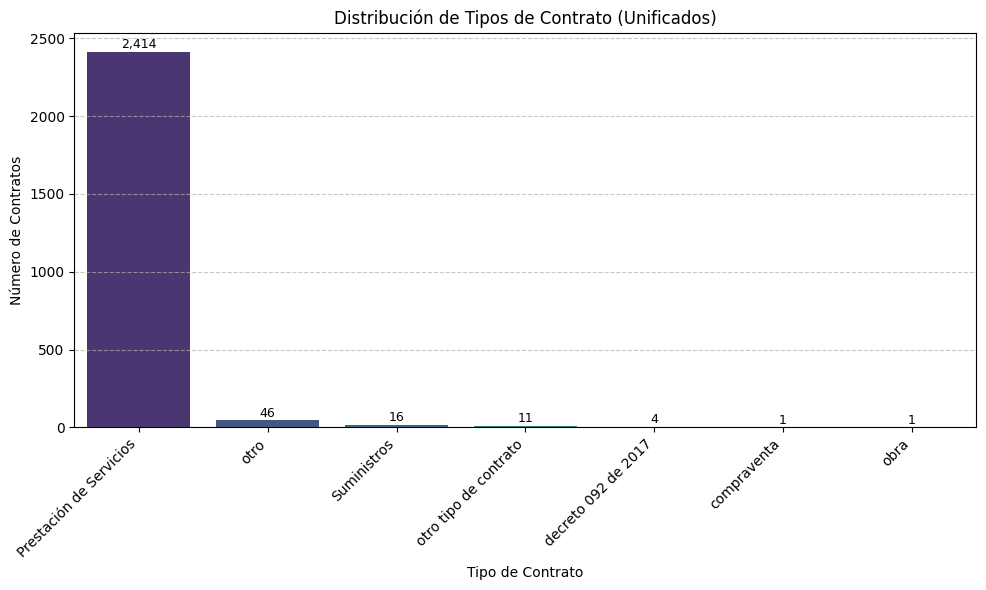

     ✅ Visualización de Tipos de Contrato (Unificados) completada.

  → Analizando Modalidades de Selección...
  → Abreviando nombres en la columna 'modalidad_de_contrataci_n' para la visualización...
     ✅ Abreviación de modalidades de selección completada.
     ✅ Distribución de 'modalidad_de_contrataci_n' (Abreviada):


modalidad_corta
Contr. Directa                           2152
Contr. Directa (Ley 1150/07)              260
Contr. Mín. Cuantía                        28
Contr. Directa (ofertas)                   27
Mín. Cuantía                               10
Contr. Rég. Especial                        5
Sel. Abr. Menor Cuantía (Ley 1150/07)       5
Sel. Abr. Subasta Inv.                      1
Sel. Abr. Menor Cuantía                     1
Contr. y Conv. (+2 partes)                  1
Licitación Pública                          1
Rég. Especial                               1
Subasta                                     1
Name: count, dtype: int64

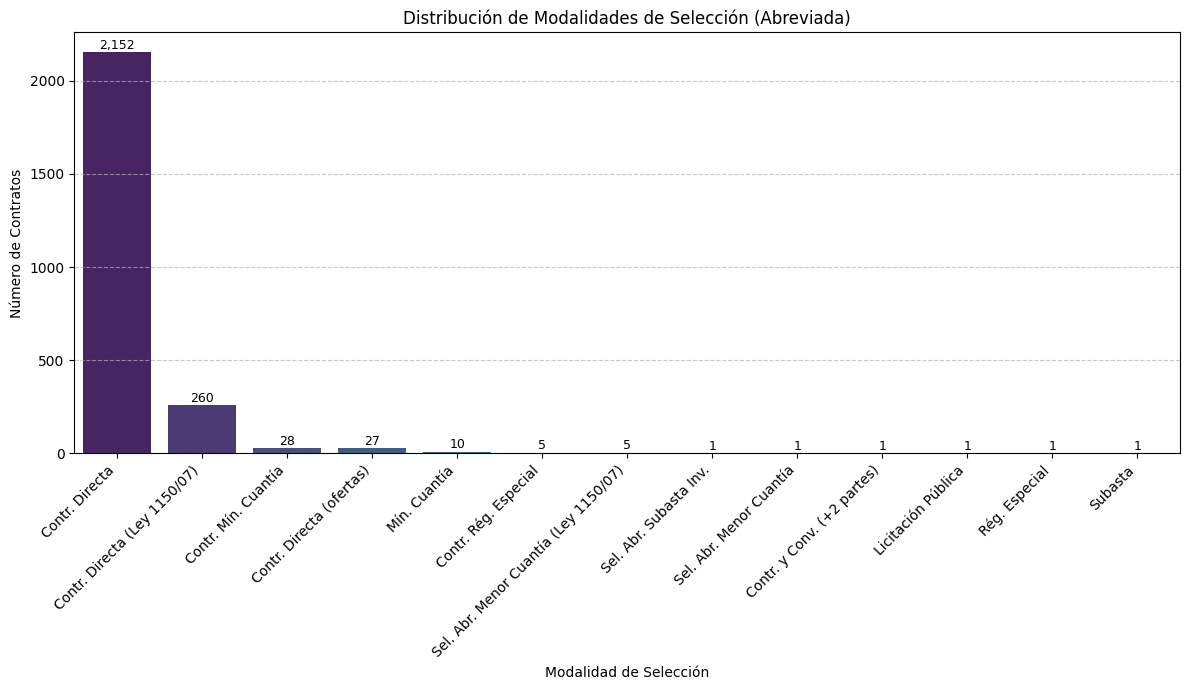

     ✅ Visualización de Modalidades de Selección completada.

--- Paso 6 Completado ---
Análisis de tipos de contrato (unificados) y modalidades de selección realizado. Listo para el siguiente paso del EDA.


In [ ]:
# --- Paso 6: Análisis Exploratorio de Datos (EDA) - Tipos de Contrato y Modalidades de Selección ---

print("--- Paso 6: Analizando Tipos de Contrato y Modalidades de Selección ---")

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando análisis.")

    # --- Análisis de Tipos de Contrato ---
    print("\n  → Analizando Tipos de Contrato...")
    contract_type_column = 'tipo_de_contrato'

    if contract_type_column in df_contracts.columns:
        # --- Unificar variaciones de nombres de tipo de contrato ---
        print(f"  → Unificando variaciones en la columna '{contract_type_column}'...")
        # Convertir a minúsculas para facilitar la comparación
        df_contracts[contract_type_column] = df_contracts[contract_type_column].str.lower()

        # Definir mapeos para unificación
        unification_map = {
            'prestación de servicios': 'Prestación de Servicios',
            'suministro': 'Suministros',
            'suministros': 'Suministros' # Asegurar que la forma plural también se mapee
            # Agrega otros mapeos si identificas más variaciones
        }

        # Aplicar el mapeo
        # Usamos .map() y fillna() para mantener los valores que no están en el mapa original
        df_contracts[contract_type_column] = df_contracts[contract_type_column].map(unification_map).fillna(df_contracts[contract_type_column])

        # Corregir capitalización específica para "Prestación de Servicios" si se usó lower()
        df_contracts.loc[df_contracts[contract_type_column] == 'prestación de servicios', contract_type_column] = 'Prestación de Servicios'


        print("     ✅ Unificación de nombres de tipo de contrato completada.")
        # --- Fin de la Unificación ---


        contract_type_distribution = df_contracts[contract_type_column].value_counts().dropna() # Drop NaN counts

        if not contract_type_distribution.empty:
            print(f"     ✅ Distribución de '{contract_type_column}' (Después de unificación):")
            display(contract_type_distribution)

            # Visualización: Gráfico de barras de Tipos de Contrato
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=contract_type_distribution.index, y=contract_type_distribution.values, palette='viridis', hue=contract_type_distribution.index, legend=False) # Add hue to avoid FutureWarning
            plt.title('Distribución de Tipos de Contrato (Unificados)')
            plt.xlabel('Tipo de Contrato')
            plt.ylabel('Número de Contratos')
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()

            # Añadir etiquetas de valor a las barras
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height()):,}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                            textcoords='offset points')

            plt.show()
            print("     ✅ Visualización de Tipos de Contrato (Unificados) completada.")

        else:
            print(f"     ⚠ï¸ No se encontraron datos válidos en la columna '{contract_type_column}' después de la unificación.")
    else:
        print(f"     ❌ La columna '{contract_type_column}' no se encontró en el DataFrame.")


    # --- Análisis de Modalidades de Selección ---
    print("\n  → Analizando Modalidades de Selección...")
    selection_modality_column = 'modalidad_de_contrataci_n' # Correct column name from previous analysis

    if selection_modality_column in df_contracts.columns:
        # --- Abbreviate selection modality names ---
        print(f"  → Abreviando nombres en la columna '{selection_modality_column}' para la visualización...")
        selection_modality_mapping = {
            'Contratación directa': 'Contr. Directa',
            'Contratación Directa (Ley 1150 de 2007)': 'Contr. Directa (Ley 1150/07)',
            'Contratación Mínima Cuantía': 'Contr. Mín. Cuantía',
            'Contratación Directa (con ofertas)': 'Contr. Directa (ofertas)',
            'Mínima cuantía': 'Mín. Cuantía',
            'Contratación régimen especial': 'Contr. Rég. Especial',
            'Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)': 'Sel. Abr. Menor Cuantía (Ley 1150/07)',
            'Selección abreviada subasta inversa': 'Sel. Abr. Subasta Inv.',
            'Selección Abreviada de Menor Cuantía': 'Sel. Abr. Menor Cuantía',
            'Contratos y convenios con más de dos partes': 'Contr. y Conv. (+2 partes)',
            'Licitación Pùblica': 'Lic. Pùblica',
            'Régimen Especial': 'Rég. Especial',
            'Subasta': 'Subasta'
        }

        df_contracts['modalidad_corta'] = df_contracts[selection_modality_column].map(selection_modality_mapping).fillna(df_contracts[selection_modality_column])
        print("     ✅ Abreviación de modalidades de selección completada.")
        # --- End Abbreviation ---

        selection_modality_distribution = df_contracts['modalidad_corta'].value_counts().dropna() # Use abbreviated column for distribution

        if not selection_modality_distribution.empty:
            print(f"     ✅ Distribución de '{selection_modality_column}' (Abreviada):")
            display(selection_modality_distribution)

            # Visualización: Gráfico de barras de Modalidades de Selección
            plt.figure(figsize=(12, 7)) # Ajustar tamaño si hay muchas modalidades
            ax = sns.barplot(x=selection_modality_distribution.index, y=selection_modality_distribution.values, palette='viridis', hue=selection_modality_distribution.index, legend=False) # Add hue to avoid FutureWarning
            plt.title('Distribución de Modalidades de Selección (Abreviada)')
            plt.xlabel('Modalidad de Selección')
            plt.ylabel('Número de Contratos')
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()

            # Añadir etiquetas de valor a las barras
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height()):,}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                            textcoords='offset points')

            plt.show()
            print("     ✅ Visualización de Modalidades de Selección completada.")

        else:
            print(f"     ⚠ï¸ No se encontraron datos válidos en la columna '{selection_modality_column}'.")
    else:
        print(f"     ❌ La columna '{selection_modality_column}' no se encontró en el DataFrame.")


else:
    print("  ⚠ï¸ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar el análisis.")


print("\n--- Paso 6 Completado ---")
print("Análisis de tipos de contrato (unificados) y modalidades de selección realizado. Listo para el siguiente paso del EDA.")

--- Analizando Conteo de Contratos por Año ---
  → DataFrame 'df_contracts' encontrado. Iniciando conteo por año.

  → Usando 'fecha_de_firma_del_contrato' para el conteo por año.
  → Convirtiendo columna de fecha a formato datetime...
     ✅ Conversión a datetime completada.
  → Extrayendo el año de la columna de fecha...
     ✅ Año extraído.
  → Agrupando por año y contando el número de contratos...
     ✅ Conteo por año calculado.


Año
2008     11
2009      4
2010      6
2012      1
2013      5
2014      2
2016     12
2017     39
2018     59
2019     76
2020    260
2021    300
2022    356
2023    359
2024    496
2025    507
dtype: int64


  → Visualizando el conteo de contratos por año...


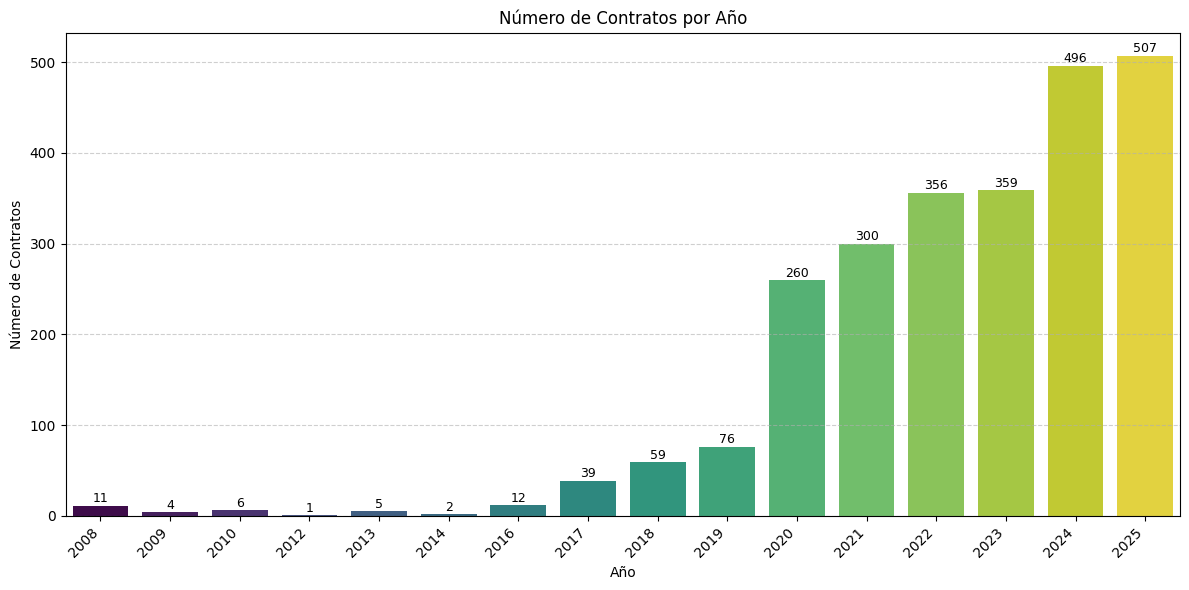


  → Visualización del conteo de contratos por año completada.

--- Conteo de Contratos por Año Completado ---


In [ ]:
# --- Análisis Exploratorio de Datos (EDA) - Conteo de Contratos por Año ---

print("--- Analizando Conteo de Contratos por Año ---")

# Importar bibliotecas necesarias (Asegurarnos de que estén importadas)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarnos de que df_contracts esté disponible y tenga la columna de fecha
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando conteo por año.")

    # Identificar la columna de fecha relevante (usaremos fecha_de_firma_del_contrato como prioridad)
    date_column = None
    if 'fecha_de_firma_del_contrato' in df_contracts.columns:
        date_column = 'fecha_de_firma_del_contrato'
    elif 'fecha_inicio_ejecuci_n' in df_contracts.columns: # Fallback if firma date is not available
        date_column = 'fecha_inicio_ejecuci_n'

    if date_column:
        print(f"\n  → Usando '{date_column}' para el conteo por año.")

        # Limpieza y preparación: Convertir la columna de fecha a datetime
        print("  → Convirtiendo columna de fecha a formato datetime...")
        # Usamos errors='coerce' para convertir fechas no parseables a NaT (Not a Time)
        df_contracts[date_column] = pd.to_datetime(df_contracts[date_column], errors='coerce')
        print("     ✅ Conversión a datetime completada.")

        # Eliminar filas donde la fecha es nula para el conteo por año
        df_count_by_year = df_contracts.dropna(subset=[date_column]).copy()

        if not df_count_by_year.empty:
            # Extraer el año de la fecha
            print("  → Extrayendo el año de la columna de fecha...")
            df_count_by_year['Año'] = df_count_by_year[date_column].dt.year
            print("     ✅ Año extraído.")

            # Agrupar por año y contar el número de contratos
            print("  → Agrupando por año y contando el número de contratos...")
            yearly_contract_counts = df_count_by_year.groupby('Año').size() # Use size() for row counts
            print("     ✅ Conteo por año calculado.")
            display(yearly_contract_counts)

            # --- Visualización: Gráfico de barras del conteo de contratos por año ---
            print("\n  → Visualizando el conteo de contratos por año...")

            if not yearly_contract_counts.empty:
                plt.figure(figsize=(12, 6))
                # Usar un gráfico de barras
                ax = sns.barplot(x=yearly_contract_counts.index, y=yearly_contract_counts.values, palette='viridis', hue=yearly_contract_counts.index, legend=False) # Add hue to avoid FutureWarning

                # Añadir etiquetas de valor a las barras
                for p in ax.patches:
                    ax.annotate(f'{int(p.get_height()):,}',
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                                textcoords='offset points')

                plt.title('Número de Contratos por Año')
                plt.xlabel('Año')
                plt.ylabel('Número de Contratos')
                plt.xticks(rotation=45, ha='right') # Rotar etiquetas si hay muchos años
                plt.grid(axis='y', linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.show()

                print("\n  → Visualización del conteo de contratos por año completada.")

            else:
                 print("     ⚠ï¸ No hay datos de conteo por año para visualizar.")


        else:
            print("  ⚠ï¸ No hay datos válidos (fecha no nula) para el conteo por año.")


    elif not date_column:
        print("  ⚠ï¸ No se encontró una columna de fecha relevante ('fecha_de_firma_del_contrato' o 'fecha_inicio_ejecuci_n') en el DataFrame.")


else:
    print("  ⚠ï¸ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar el conteo por año.")


print("\n--- Conteo de Contratos por Año Completado ---")

--- Generando Gráfica de Cantidad de Contratos por Secretaría ---
  → DataFrame 'df_contracts' y columna 'nombre_entidad_corto' encontrados. Iniciando conteo por secretaría.
  → Nombres de secretarías abreviados para visualización.
  → Contando contratos por secretaría...
     ✅ Conteo por secretaría calculado:


nombre_entidad_display
Sec. Mujer, Equidad y Diver...    1831
Sec. Paz Territorial y Reco...     326
Gobernación Valle del Cauca        297
Sec. Convivencia y Segurida...      14
Sec. Educación                       5
Sec. Cultura                         5
DADI                                 4
Sec. Salud                           3
Depto. Administrativo de Pl...       3
GOBERNACIÓN DEL VALLE DEL C...       3
Sec. Asuntos Étnicos                 1
Sec. Desarrollo Rural, Agri...       1
Name: count, dtype: int64


  → Visualizando la cantidad de contratos por secretaría...


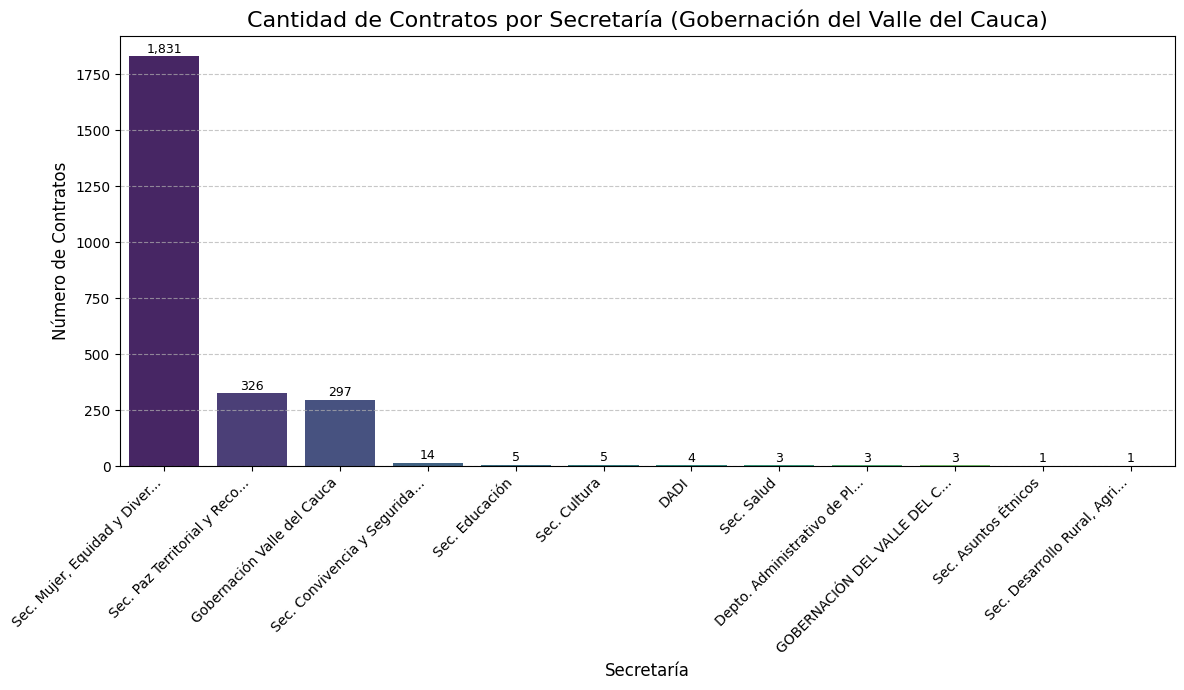


  ✅ Gráfica de cantidad de contratos por secretaría completada.

--- Análisis de Cantidad de Contratos por Secretaría Completado ---


In [ ]:
# --- Cantidad de Contratos por Secretaría ---

print("--- Generando Gráfica de Cantidad de Contratos por Secretaría ---")

# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarnos de que df_contracts esté disponible y tenga la columna 'nombre_entidad_corto'
if 'df_contracts' in locals() and not df_contracts.empty and 'nombre_entidad_corto' in df_contracts.columns:
    print("  → DataFrame 'df_contracts' y columna 'nombre_entidad_corto' encontrados. Iniciando conteo por secretaría.")

    # --- Función para truncar nombres de entidad ---
    def truncate_entity_name(name, max_len=30):
        if isinstance(name, str) and len(name) > max_len:
            return name[:max_len-3].strip() + '...'
        return name

    # Aplicar truncamiento a la columna 'nombre_entidad_corto' para la visualización
    df_contracts['nombre_entidad_display'] = df_contracts['nombre_entidad_corto'].apply(truncate_entity_name)
    print("  → Nombres de secretarías abreviados para visualización.")

    # Contar la cantidad de contratos por cada entidad/secretaría usando la columna abreviada
    print("  → Contando contratos por secretaría...")
    contracts_by_entity = df_contracts['nombre_entidad_display'].value_counts().dropna()

    if not contracts_by_entity.empty:
        print("     ✅ Conteo por secretaría calculado:")
        display(contracts_by_entity)

        # Visualización: Gráfico de barras de cantidad de contratos por secretaría
        print("\n  → Visualizando la cantidad de contratos por secretaría...")

        plt.figure(figsize=(12, 7)) # Ajustar tamaño para mejor visualización
        ax = sns.barplot(x=contracts_by_entity.index, y=contracts_by_entity.values, palette='viridis', hue=contracts_by_entity.index, legend=False)

        plt.title('Cantidad de Contratos por Secretaría (Gobernación del Valle del Cauca)', fontsize=16)
        plt.xlabel('Secretaría', fontsize=12)
        plt.ylabel('Número de Contratos', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Añadir etiquetas de valor a las barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height()):,}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.show()
        print("\n  ✅ Gráfica de cantidad de contratos por secretaría completada.")

    else:
        print("  ⚠ï¸ No se encontraron datos válidos para el conteo de contratos por secretaría.")

elif 'df_contracts' not in locals() or df_contracts.empty:
    print("  ⚠ï¸ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar el análisis.")
elif 'nombre_entidad_corto' not in df_contracts.columns:
    print("  ❌ La columna 'nombre_entidad_corto' no se encontró en el DataFrame. Asegòrate de que la limpieza de nombres de entidad se haya ejecutado previamente.")

print("\n--- Análisis de Cantidad de Contratos por Secretaría Completado ---")

--- Paso 7: Analizando Top 10 Contratistas (por Cantidad y por Valor) ---
  → DataFrame 'df_contracts' encontrado. Iniciando análisis de contratistas.

  → Limpiando nombres de contratista (fusionando variaciones de 'Corpovalle' y acortando 'Fondo Mixto')...
     ✅ Limpieza de nombres de contratista completada.
  → Nombres de contratistas abreviados para visualización.

--- Ranking por Cantidad de Contratos ---
  → Distribución por 'nom_raz_social_contratista' (Abreviada):
    ✅ Top 10 Contratistas por Cantidad de Contratos:


nom_raz_social_contratista_corto
MARIA NATHALIA BLANCO...     17
GICEL SMITH GALLEGO CAÑÓN    15
CORPOVALLE Unificado         14
maria camila gil mondr...    14
MARIA VICTORIA DIAZ HE...    14
GLADYS ADRIANA REYES M...    14
YORYANI MARTINEZ RAMOS       13
CARLOS HUMBERTO MARTIN...    13
CLAUDIA LORENA LLANOS...     13
Diana Patricia López d...    13
Name: count, dtype: int64

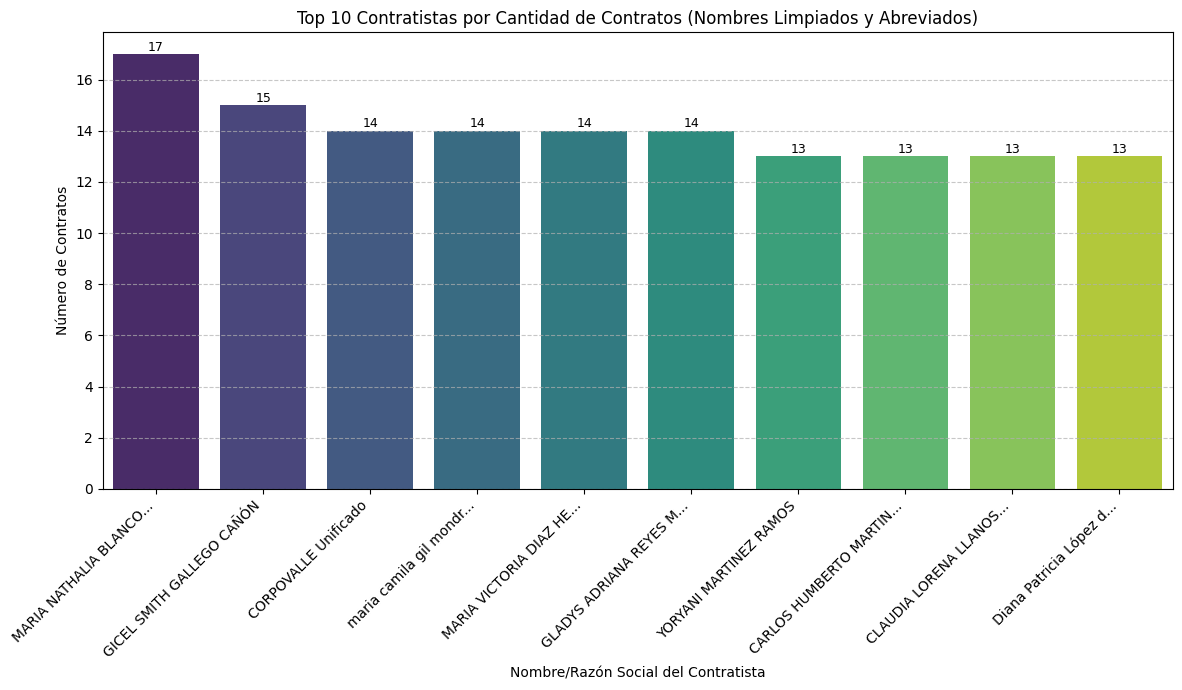

    ✅ Visualización del Top 10 Contratistas por Cantidad completada.

--- Ranking por Valor Total Asignado ---
  → Distribución del Valor Total Asignado por 'nom_raz_social_contratista' (Abreviada):
    ✅ Top 10 Contratistas por Valor Total Asignado:


nom_raz_social_contratista_corto
CORPOVALLE Unificado         22558799600
FUNDACION AVANZAR SOCIAL      8222500000
RECREAVALLE                   4320000000
FONDO MIXTO                   2973463143
HOSPITAL ISAIAS DUARTE...     2000000000
QUINBERLAB S.A.S              2000000000
FUNDACION MUNDIAL AMIG...     1950000000
FUNDACIÓN PROMOCIÓN Y...      1904285714
FUNDACIÓN AVE FÉNIX           1760892907
HOSP DEPTAL SAN RAFAEL...     1350000000
Name: valor_final, dtype: int64

/tmp/ipython-input-1618107450.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contractor_value_rank.head(top_n).index, y=contractor_value_rank.head(top_n).values, palette='viridis')


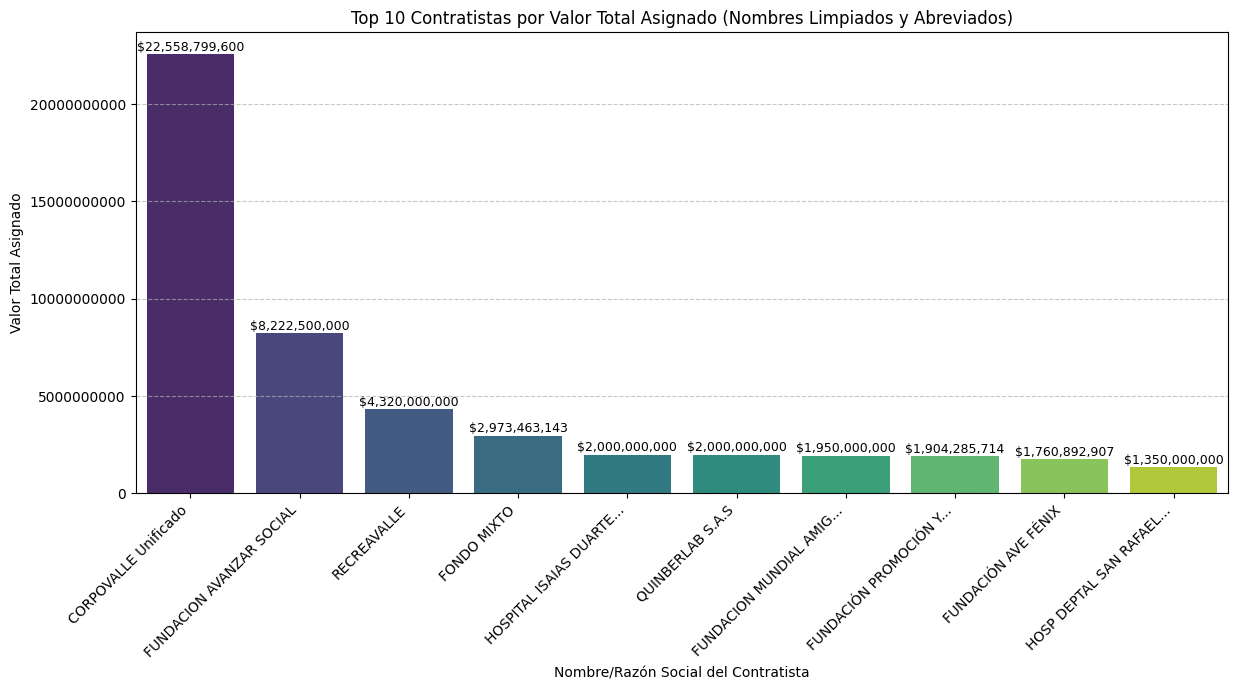

    ✅ Visualización del Top 10 Contratistas por Valor completada.

--- Paso 7 Completado ---
Análisis del Top 10 de contratistas por Cantidad y por Valor realizado. Listo para el siguiente paso del EDA.


In [ ]:
# --- Paso 7: Análisis Exploratorio de Datos (EDA) - Top 10 Contratistas (por Cantidad y por Valor) ---

print("--- Paso 7: Analizando Top 10 Contratistas (por Cantidad y por Valor) ---")

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando análisis de contratistas.")

    contractor_column = 'nom_raz_social_contratista'
    value_column = 'valor_final' # Usaremos la columna de valor final creada en el Paso 5

    if contractor_column in df_contracts.columns and value_column in df_contracts.columns:

        # --- Limpieza de Nombres de Contratista (Fusionar "Corpovalle" variaciones y acortar "Fondo Mixto") ---
        print("\n  → Limpiando nombres de contratista (fusionando variaciones de 'Corpovalle' y acortando 'Fondo Mixto')...")
        # Identificar patrones comunes para Corpovalle (insensible a mayúsculas y espacios extra)
        corpovalle_patterns = ['corpovalle', 'corporacion para el desarrollo social y cultural', 'corporacion para el desarrollo social y cultural del valle del cauca']
        corpovalle_replacement = 'CORPOVALLE Unificado'

        # Crear una máscara booleana para identificar las filas que contienen los patrones de Corpovalle
        # Usamos lower() y str.contains() para buscar los patrones en la columna de contratistas
        # Combinamos las máscaras con | (OR lógico)
        corpovalle_mask = df_contracts[contractor_column].str.lower().str.contains('|'.join(corpovalle_patterns), na=False, regex=True)

        # Reemplazar los nombres que coinciden con el nombre unificado de Corpovalle
        df_contracts.loc[corpovalle_mask, contractor_column] = corpovalle_replacement

        # Acortar el nombre largo del Fondo Mixto
        fondo_mixto_long_name = 'FONDO MIXTO PARA LA PROMOCION DEL DEPORTE EL DESARROLLO INTEGRAL Y LA GESTION SOCIAL'
        fondo_mixto_short_name = 'FONDO MIXTO'
        df_contracts.loc[df_contracts[contractor_column] == fondo_mixto_long_name, contractor_column] = fondo_mixto_short_name


        print("     ✅ Limpieza de nombres de contratista completada.")
        # --- Fin de la Limpieza ---

        # --- Función para truncar nombres de contratistas ---
        def truncate_contractor_name(name, max_len=25):
            if isinstance(name, str) and len(name) > max_len:
                return name[:max_len-3].strip() + '...'
            return name

        # Crear una columna abreviada para la visualización
        df_contracts['nom_raz_social_contratista_corto'] = df_contracts[contractor_column].apply(truncate_contractor_name)
        print("  → Nombres de contratistas abreviados para visualización.")


        # --- Ranking por Cantidad de Contratos ---
        print("\n--- Ranking por Cantidad de Contratos ---")
        # Contar la frecuencia de cada contratista usando el nombre abreviado
        contractor_counts = df_contracts['nom_raz_social_contratista_corto'].value_counts().dropna() # Drop NaN counts

        if not contractor_counts.empty:
            print(f"  → Distribución por '{contractor_column}' (Abreviada):")
            # Mostrar el Top 10 de contratistas por cantidad
            top_n = 10
            print(f"    ✅ Top {top_n} Contratistas por Cantidad de Contratos:")
            display(contractor_counts.head(top_n))

            # Visualización: Gráfico de barras del Top 10 por Cantidad
            if len(contractor_counts) > 1:
                 plt.figure(figsize=(12, 7))
                 ax = sns.barplot(x=contractor_counts.head(top_n).index, y=contractor_counts.head(top_n).values, palette='viridis', hue=contractor_counts.head(top_n).index, legend=False) # Add hue to avoid FutureWarning
                 plt.title(f'Top {top_n} Contratistas por Cantidad de Contratos (Nombres Limpiados y Abreviados)')
                 plt.xlabel('Nombre/Razón Social del Contratista')
                 plt.ylabel('Número de Contratos')
                 plt.xticks(rotation=45, ha='right')
                 plt.grid(axis='y', linestyle='--', alpha=0.7)
                 plt.tight_layout()

                 # Añadir etiquetas de valor a las barras
                 for p in ax.patches:
                     ax.annotate(f'{int(p.get_height()):,}',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                                 textcoords='offset points')

                 plt.show()
                 print(f"    ✅ Visualización del Top {top_n} Contratistas por Cantidad completada.")
            elif len(contractor_counts) == 1:
                 print(f"    → Solo se encontró un contratista: {contractor_counts.index[0]} con {contractor_counts.iloc[0]} contratos.")
        else:
            print(f"    ⚠ï¸ No se encontraron datos válidos en la columna '{contractor_column}' para ranking por cantidad.")

        # --- Ranking por Valor Total Asignado ---
        print("\n--- Ranking por Valor Total Asignado ---")
        # Asegurarnos de que la columna de valor sea numérica y no tenga nulos para la suma
        df_value_valid = df_contracts.dropna(subset=[contractor_column, value_column]).copy()

        # Agrupar por el nombre abreviado del contratista y sumar el valor final
        contractor_value_sum = df_value_valid.groupby('nom_raz_social_contratista_corto')[value_column].sum()

        # Ordenar por la suma total del valor en orden descendente
        contractor_value_rank = contractor_value_sum.sort_values(ascending=False)

        if not contractor_value_rank.empty:
            print(f"  → Distribución del Valor Total Asignado por '{contractor_column}' (Abreviada):")
            # Mostrar el Top 10 de contratistas por valor
            top_n = 10
            print(f"    ✅ Top {top_n} Contratistas por Valor Total Asignado:")
            display(contractor_value_rank.head(top_n))

            # Visualización: Gráfico de barras del Top 10 por Valor
            if len(contractor_value_rank) > 1:
                 plt.figure(figsize=(12, 7))
                 # Usar seaborn's barplot
                 ax = sns.barplot(x=contractor_value_rank.head(top_n).index, y=contractor_value_rank.head(top_n).values, palette='viridis')
                 plt.title(f'Top {top_n} Contratistas por Valor Total Asignado (Nombres Limpiados y Abreviados)')
                 plt.xlabel('Nombre/Razón Social del Contratista')
                 plt.ylabel('Valor Total Asignado')
                 plt.xticks(rotation=45, ha='right')
                 plt.grid(axis='y', linestyle='--', alpha=0.7)
                 plt.tight_layout()

                 # Ajustar formato del eje Y para mostrar números enteros sin notación exponencial
                 from matplotlib.ticker import ScalarFormatter
                 for axis in [ax.yaxis]:
                     axis.set_major_formatter(ScalarFormatter())
                 ax.ticklabel_format(style='plain', axis='y') # Force plain notation

                 # Añadir etiquetas de valor a las barras
                 for p in ax.patches:
                     ax.annotate(f'${int(p.get_height()):,}',
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                                 textcoords='offset points')

                 plt.show()
                 print(f"    ✅ Visualización del Top {top_n} Contratistas por Valor completada.")
            elif len(contractor_value_rank) == 1:
                 print(f"    → Solo se encontró un contratista con valor asignado: {contractor_value_rank.index[0]} con valor total {contractor_value_rank.iloc[0]:,.0f}.")

            else:
                 print(f"    ⚠ï¸ No se encontraron contratistas con valor asignado en la columna '{contractor_column}'.")
        else:
            print(f"    ⚠ï¸ No hay datos válidos (contratista y valor no nulos) para calcular el ranking por valor.")


    elif contractor_column not in df_contracts.columns:
        print(f"  ❌ La columna '{contractor_column}' para contratistas no se encontró en el DataFrame.")
    elif value_column not in df_contracts.columns:
        print(f"  ❌ La columna '{value_column}' para el valor no se encontró en el DataFrame.")


else:
    print("  ⚠ï¸ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar el análisis de contratistas.")


print("\n--- Paso 7 Completado ---")
print("Análisis del Top 10 de contratistas por Cantidad y por Valor realizado. Listo para el siguiente paso del EDA.")

In [ ]:
# --- Paso 9: Guardar el DataFrame en Google Drive ---

print("--- Paso 9: Guardando DataFrame en Google Drive ---")

# Asegurarnos de que df_contracts esté disponible
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Procediendo a guardar en Google Drive.")

    # Montar Google Drive
    print("  → Montando Google Drive...")
    from google.colab import drive
    try:
        drive.mount('/content/drive')
        print("     ✅ Google Drive montado correctamente.")
        drive_mounted = True
    except Exception as e:
        print(f"     ❌ Error al montar Google Drive: {e}")
        drive_mounted = False

    if drive_mounted:
        # Definir la ruta de la carpeta en Google Drive
        folder_path = '/content/drive/MyDrive/hacemos con ingenieria'
        output_filename = 'contratos_analisis_exploratorio.csv'
        output_filepath = f'{folder_path}/{output_filename}'

        # Crear la carpeta si no existe
        import os
        print(f"\n  → Verificando/Creando carpeta: {folder_path}...")
        try:
            os.makedirs(folder_path, exist_ok=True)
            print(f"     ✅ Carpeta '{folder_path}' asegurada.")
        except Exception as e:
            print(f"     ❌ Error al crear/verificar carpeta: {e}")
            folder_created = False
        else:
            folder_created = True

        if folder_created:
            # Guardar el DataFrame como archivo CSV en la carpeta
            print(f"\n  → Guardando DataFrame en '{output_filepath}'...")
            try:
                df_contracts.to_csv(output_filepath, index=False) # index=False para no incluir el índice del DataFrame
                print(f"     ✅ DataFrame guardado exitosamente en '{output_filepath}'.")
            except Exception as e:
                print(f"     ❌ Error al guardar DataFrame en Drive: {e}")
        else:
            print("  ⚠️ No se pudo guardar el DataFrame porque la carpeta no se creó correctamente.")

    else:
        print("  ⚠️ Google Drive no se montó correctamente. No se puede guardar el DataFrame.")

else:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede guardar.")


print("\n--- Paso 9 Completado ---")

--- Paso 9: Guardando DataFrame en Google Drive ---
  → DataFrame 'df_contracts' encontrado. Procediendo a guardar en Google Drive.
  → Montando Google Drive...
Mounted at /content/drive
     ✅ Google Drive montado correctamente.

  → Verificando/Creando carpeta: /content/drive/MyDrive/hacemos con ingenieria...
     ✅ Carpeta '/content/drive/MyDrive/hacemos con ingenieria' asegurada.

  → Guardando DataFrame en '/content/drive/MyDrive/hacemos con ingenieria/contratos_analisis_exploratorio.csv'...
     ✅ DataFrame guardado exitosamente en '/content/drive/MyDrive/hacemos con ingenieria/contratos_analisis_exploratorio.csv'.

--- Paso 9 Completado ---


In [ ]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2493 entries, 0 to 3836
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   nivel_entidad                     2493 non-null   object        
 1   codigo_entidad_en_secop           2493 non-null   object        
 2   nombre_de_la_entidad              2493 non-null   object        
 3   nit_de_la_entidad                 2493 non-null   object        
 4   departamento_entidad              2493 non-null   object        
 5   municipio_entidad                 2493 non-null   object        
 6   estado_del_proceso                2493 non-null   object        
 7   modalidad_de_contrataci_n         2493 non-null   object        
 8   objeto_a_contratar                2493 non-null   object        
 9   objeto_del_proceso                2493 non-null   object        
 10  tipo_de_contrato                  2493 non-null   obj

In [ ]:
# --- Cargar DataFrame desde Google Drive ---

print("--- Cargando DataFrame desde Google Drive ---")

# Montar Google Drive
print("  → Montando Google Drive...")
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("     ✅ Google Drive montado correctamente.")
    drive_mounted = True
except Exception as e:
    print(f"     ❌ Error al montar Google Drive: {e}")
    drive_mounted = False

if drive_mounted:
    # Definir la ruta del archivo CSV en Google Drive
    folder_path = '/content/drive/MyDrive/hacemos con ingenieria'
    output_filename = 'contratos_analisis_exploratorio.csv'
    output_filepath = f'{folder_path}/{output_filename}'

    # Verificar si el archivo existe antes de intentar cargarlo
    import os
    if os.path.exists(output_filepath):
        print(f"\n  → Archivo encontrado: '{output_filepath}'. Cargando DataFrame...")
        try:
            df_contracts_loaded = pd.read_csv(output_filepath)
            print("     ✅ DataFrame cargado exitosamente.")
            # Asignar al nombre original del DataFrame si es necesario para análisis posteriores
            df_contracts = df_contracts_loaded
        except Exception as e:
            print(f"     ❌ Error al cargar DataFrame desde Drive: {e}")
            df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío en caso de error
    else:
        print(f"\n  ⚠️ Archivo no encontrado en la ruta: '{output_filepath}'.")
        df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si el archivo no existe

else:
    print("  ⚠️ Google Drive no se montó correctamente. No se puede cargar el DataFrame.")
    df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si Drive no está montado

print("\n--- Carga desde Drive Completada ---")

--- Cargando DataFrame desde Google Drive ---
  → Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ✅ Google Drive montado correctamente.

  → Archivo encontrado: '/content/drive/MyDrive/hacemos con ingenieria/contratos_analisis_exploratorio.csv'. Cargando DataFrame...
     ✅ DataFrame cargado exitosamente.

--- Carga desde Drive Completada ---


In [ ]:
# --- Verificar información del DataFrame cargado ---

print("--- Verificando información del DataFrame cargado ---")

# Asegurarnos de que df_contracts esté disponible
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Mostrando información:")
    df_contracts.info()
else:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede mostrar la información.")

print("\n--- Verificación Completada ---")

--- Verificando información del DataFrame cargado ---
  → DataFrame 'df_contracts' encontrado. Mostrando información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nivel_entidad                     2493 non-null   object
 1   codigo_entidad_en_secop           2493 non-null   int64 
 2   nombre_de_la_entidad              2493 non-null   object
 3   nit_de_la_entidad                 2493 non-null   int64 
 4   departamento_entidad              2493 non-null   object
 5   municipio_entidad                 2493 non-null   object
 6   estado_del_proceso                2493 non-null   object
 7   modalidad_de_contrataci_n         2493 non-null   object
 8   objeto_a_contratar                2493 non-null   object
 9   objeto_del_proceso                2493 non-null   object
 10  tipo_de_contrato          

In [ ]:
# --- Mostrar los 15 Contratos con Mayor Valor ---

print("--- Mostrando los 15 Contratos con Mayor Valor ---")

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if 'df_contracts' in locals() and not df_contracts.empty and 'valor_final' in df_contracts.columns and 'url_contrato' in df_contracts.columns:
    print("  → DataFrame 'df_contracts', 'valor_final' y 'url_contrato' encontrados. Procediendo a mostrar los top 15.")

    # Eliminar valores nulos o negativos en la columna de valor antes de ordenar
    df_valor_positive = df_contracts.dropna(subset=['valor_final']).copy()
    df_valor_positive = df_valor_positive[df_valor_positive['valor_final'] >= 0]

    if not df_valor_positive.empty:
        # Ordenar el DataFrame por 'valor_final' en orden descendente y seleccionar las primeras 15 filas
        top_15_contracts = df_valor_positive.sort_values(by='valor_final', ascending=False).head(15)

        print("\n  ✅ Los 15 Contratos con Mayor Valor:")

        # Formatear la columna 'url_contrato' como hipervínculos clickeables para visualización
        def make_clickable(url):
            return f'<a href="{url}" target="_blank">{url}</a>'

        # Aplicar el formato solo a la columna de URL
        top_15_contracts_styled = top_15_contracts.style.format({'url_contrato': make_clickable})


        # Seleccionar columnas relevantes para mostrar
        # display(top_15_contracts[['numero_del_contrato', 'nom_raz_social_contratista', 'valor_final', 'objeto_a_contratar', 'url_contrato']])
        # Mostrar el DataFrame formateado
        display(top_15_contracts_styled)


    else:
        print("  ⚠️ No hay datos de valor válidos (no nulos y no negativos) en el DataFrame para identificar los top 15.")

elif 'df_contracts' not in locals() or df_contracts.empty:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede mostrar los top 15 contratos.")
elif 'valor_final' not in df_contracts.columns:
    print("  ❌ La columna 'valor_final' no se encontró en el DataFrame. No se puede mostrar los top 15 contratos.")
elif 'url_contrato' not in df_contracts.columns:
     print("  ❌ La columna 'url_contrato' no se encontró en el DataFrame. No se pueden mostrar las URLs.")


print("\n--- Top 15 Contratos por Valor Completado ---")

--- Mostrando los 15 Contratos con Mayor Valor ---
  → DataFrame 'df_contracts', 'valor_final' y 'url_contrato' encontrados. Procediendo a mostrar los top 15.

  ✅ Los 15 Contratos con Mayor Valor:



--- Top 15 Contratos por Valor Completado ---


In [ ]:
# --- Análisis Exploratorio de Datos (EDA) - Gráfica Interactiva del Valor del Contrato por Mes ---

print("--- Generando Gráfica Interactiva del Valor del Contrato por Mes ---")

# Importar bibliotecas necesarias
import pandas as pd
import altair as alt # Usaremos Altair para la interactividad
import numpy as np # Para manejar posibles valores no finitos

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando gráfica interactiva.")

    # Identificar la columna de fecha relevante (usaremos fecha_de_firma_del_contrato como prioridad)
    date_column = None
    if 'fecha_de_firma_del_contrato' in df_contracts.columns:
        date_column = 'fecha_de_firma_del_contrato'
    elif 'fecha_inicio_ejecuci_n' in df_contracts.columns: # Fallback if firma date is not available
        date_column = 'fecha_inicio_ejecuci_n'

    # Asegurarnos de que la columna de valor final esté disponible y sea numérica
    if 'valor_final' in df_contracts.columns:
         value_column = 'valor_final'
         value_analysis_possible = True
    else:
         print("  ⚠️ Columna 'valor_final' no encontrada. No se puede realizar la gráfica interactiva.")
         value_analysis_possible = False


    if date_column and value_analysis_possible:
        print(f"\n  → Usando '{date_column}' para el eje de tiempo y '{value_column}' para el valor.")

        # Limpieza y preparación: Convertir la columna de fecha a datetime
        print("  → Convirtiendo columna de fecha a formato datetime...")
        df_contracts[date_column] = pd.to_datetime(df_contracts[date_column], errors='coerce')
        print("     ✅ Conversión a datetime completada.")

        # Eliminar filas donde la fecha o el valor final son nulos o inválidos para este análisis
        df_interactive = df_contracts.dropna(subset=[date_column, value_column]).copy()
        df_interactive = df_interactive[df_interactive[value_column] >= 0] # Consider only non-negative values

        if not df_interactive.empty:

            # --- Preparación de datos para la gráfica interactiva ---
            print("\n  → Preparando datos para la gráfica interactiva...")

            # Redondear y formatear la columna de valor para el tooltip
            # Usamos floor para quitar decimales y luego formato con separadores de miles
            df_interactive['Valor_Formateado'] = np.floor(df_interactive[value_column]).astype(int).apply(lambda x: f'{x:,}')

            # Crear una columna de fecha a nivel mensual para el eje X
            df_interactive['Fecha_Mes'] = df_interactive[date_column].dt.to_period('M').astype(str) # Convertir a string para consistencia en Altair

            print("     ✅ Datos preparados.")

            # --- Generar la gráfica interactiva con Altair ---
            print("\n  → Generando la gráfica interactiva...")

            chart = alt.Chart(df_interactive).mark_circle().encode(
                x=alt.X('Fecha_Mes', title='Fecha (Año-Mes)', sort='x'), # Ordenar por fecha
                y=alt.Y(value_column, title='Valor del Contrato'),
                tooltip=[
                    alt.Tooltip('numero_del_contrato', title='Número Contrato'),
                    alt.Tooltip('nom_raz_social_contratista', title='Contratista'),
                    alt.Tooltip(value_column, title='Valor (Original)', format=','), # Mostrar valor original con separador de miles
                    alt.Tooltip('Valor_Formateado', title='Valor'), # Mostrar valor formateado sin decimales
                    alt.Tooltip('objeto_a_contratar', title='Objeto Contrato')
                ]
            ).properties(
                title='Valor del Contrato por Fecha (Año-Mes) - Gráfica Interactiva'
            ).interactive() # Habilitar interactividad (zoom y pan)


            # Mostrar la gráfica
            print("\n  → Mostrando la gráfica interactiva:")
            chart.display()

            print("\n  → Generación de gráfica interactiva completada.")

        else:
            print("  ⚠️ No hay datos válidos (fecha y valor no nulos/negativos) para generar la gráfica interactiva.")


    elif not date_column:
        print("  ⚠️ No se encontró una columna de fecha relevante ('fecha_de_firma_del_contrato' o 'fecha_inicio_ejecuci_n') en el DataFrame.")
    # else (value_analysis_possible was False) handled above


else:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar la gráfica interactiva.")


print("\n--- Gráfica Interactiva Completada ---")

--- Generando Gráfica Interactiva del Valor del Contrato por Mes ---
  → DataFrame 'df_contracts' encontrado. Iniciando gráfica interactiva.

  → Usando 'fecha_de_firma_del_contrato' para el eje de tiempo y 'valor_final' para el valor.
  → Convirtiendo columna de fecha a formato datetime...
     ✅ Conversión a datetime completada.

  → Preparando datos para la gráfica interactiva...
     ✅ Datos preparados.

  → Generando la gráfica interactiva...

  → Mostrando la gráfica interactiva:


alt.Chart(...)


  → Generación de gráfica interactiva completada.

--- Gráfica Interactiva Completada ---


In [ ]:
# --- Análisis Exploratorio de Datos (EDA) - Gráfica Interactiva de Valor Total por Año ---

print("--- Generando Gráfica Interactiva de Valor Total por Año ---")

# Importar bibliotecas necesarias
import pandas as pd
import altair as alt # Usaremos Altair para la interactividad
import numpy as np # Para manejo de datos

# Asegurarnos de que df_contracts esté disponible y tenga las columnas necesarias
if 'df_contracts' in locals() and not df_contracts.empty:
    print("  → DataFrame 'df_contracts' encontrado. Iniciando gráfica interactiva de valor total por año.")

    # Identificar la columna de fecha relevante (usaremos fecha_de_firma_del_contrato como prioridad)
    date_column = None
    if 'fecha_de_firma_del_contrato' in df_contracts.columns:
        date_column = 'fecha_de_firma_del_contrato'
    elif 'fecha_inicio_ejecuci_n' in df_contracts.columns: # Fallback if firma date is not available
        date_column = 'fecha_inicio_ejecuci_n'

    # Asegurarnos de que la columna de valor final esté disponible y sea numérica
    if 'valor_final' in df_contracts.columns:
         value_column = 'valor_final'
         value_analysis_possible = True
    else:
         print("  ⚠️ Columna 'valor_final' no encontrada. No se puede realizar la gráfica interactiva.")
         value_analysis_possible = False


    if date_column and value_analysis_possible:
        print(f"\n  → Usando '{date_column}' para el eje de tiempo y '{value_column}' para el valor total.")

        # Limpieza y preparación: Convertir la columna de fecha a datetime
        print("  → Convirtiendo columna de fecha a formato datetime...")
        df_contracts[date_column] = pd.to_datetime(df_contracts[date_column], errors='coerce')
        print("     ✅ Conversión a datetime completada.")

        # Eliminar filas donde la fecha o el valor final son nulos o inválidos para este análisis
        df_yearly_sum = df_contracts.dropna(subset=[date_column, value_column]).copy()
        df_yearly_sum = df_yearly_sum[df_yearly_sum[value_column] >= 0] # Consider only non-negative values

        if not df_yearly_sum.empty:

            # --- Agrupar por Año y Sumar el Valor ---
            print("\n  → Agrupando por Año y sumando el valor de los contratos...")
            df_yearly_sum['Año'] = df_yearly_sum[date_column].dt.year
            yearly_value_sum = df_yearly_sum.groupby('Año')[value_column].sum().reset_index() # Reset index para tener Año como columna
            print("     ✅ Suma por Año calculada.")
            # display(yearly_value_sum) # Opcional: mostrar la tabla de suma anual

            # --- Añadir valores de SMLV por año ---
            # Diccionario con los valores de SMLV en Colombia por año (fuente: Ministerio de Trabajo Colombia, datos aproximados para algunos años)
            # Es importante verificar que estos valores sean precisos para el análisis.
            smlv_by_year = {
                2008: 461500,
                2009: 496900,
                2010: 515000,
                2011: 535600,
                2012: 566700,
                2013: 589500,
                2014: 616000,
                2015: 644350,
                2016: 689454,
                2017: 737717,
                2018: 781242,
                2019: 828116,
                2020: 877803,
                2021: 908526,
                2022: 1000000,
                2023: 1160000,
                2024: 1300000,
                # Asumiendo un valor para 2025 para propósitos de visualización si hay datos de ese año
                2025: 1300000 # Placeholder, replace with actual value if available
            }

            # Mapear los valores de SMLV al DataFrame yearly_value_sum
            yearly_value_sum['SMLV_Año'] = yearly_value_sum['Año'].map(smlv_by_year)

            # Calcular el valor total en SMLV
            # Evitar división por cero o por valores nulos de SMLV
            yearly_value_sum['Valor_en_SMLV'] = yearly_value_sum.apply(
                lambda row: row[value_column] / row['SMLV_Año'] if pd.notnull(row['SMLV_Año']) and row['SMLV_Año'] > 0 else None,
                axis=1
            )

            print("     ✅ Valores de SMLV añadidos y valor en SMLV calculado.")
            # display(yearly_value_sum) # Opcional: mostrar la tabla con SMLV


            # --- Generar la gráfica interactiva con Altair usando dos ejes Y ---
            print("\n  → Generando la gráfica interactiva con dos ejes Y...")

            # Crear la gráfica base con ancho ajustado y título actualizado
            base = alt.Chart(yearly_value_sum).encode(
                x=alt.X('Año:O', title='Año', axis=alt.Axis(format='d')) # Usar ':O' para tratar el año como ordinal y asegurar ticks enteros, format='d' for integer display
            ).properties(
                title='Inversión Gobernación del Valle para la Equidad de Género (Pesos vs. SMLV) por Año', # Título actualizado
                width=800 # Ajustar el ancho de la gráfica (puedes experimentar con este valor)
            )

            # Línea para el Valor Total en Pesos
            line_pesos = base.mark_line(point=True, color='steelblue').encode(
                y=alt.Y(value_column, title='Suma Total del Valor del Contrato (Pesos)', axis=alt.Axis(titleColor='steelblue')), # Asignar color al título del eje
                tooltip=[
                    alt.Tooltip('Año:O', title='Año', format='d'),
                    alt.Tooltip(value_column, title='Valor Total (Pesos)', format=','), # Formato con separadores de miles
                    alt.Tooltip('SMLV_Año', title='SMLV del Año', format=','),
                    alt.Tooltip('Valor_en_SMLV', title='Valor en SMLV', format='.2f') # Formato con 2 decimales
                ]
            )

            # Línea para el Valor Total en SMLV
            line_smlv = base.mark_line(point=True, color='firebrick').encode(
                 y=alt.Y('Valor_en_SMLV', title='Suma Total del Valor del Contrato (en SMLV)', axis=alt.Axis(titleColor='firebrick')), # Eje Y secundario, asignar color
                 tooltip=[
                    alt.Tooltip('Año:O', title='Año', format='d'),
                    alt.Tooltip(value_column, title='Valor Total (Pesos)', format=','), # Formato con separadores de miles
                    alt.Tooltip('SMLV_Año', title='SMLV del Año', format=','),
                    alt.Tooltip('Valor_en_SMLV', title='Valor en SMLV', format='.2f') # Formato con 2 decimales
                ]
            )

            # Combinar las dos gráficas y superponerlas (capas)
            chart = alt.layer(line_pesos, line_smlv).resolve_scale(
                y='independent' # Usar escalas independientes para el eje Y
            ).interactive() # Habilitar interactividad (zoom y pan)


            # Mostrar la gráfica
            print("\n  → Mostrando la gráfica interactiva:")
            chart.display()

            print("\n  → Generación de gráfica interactiva completada.")

        else:
            print("  ⚠️ No hay datos válidos (fecha y valor no nulos/negativos) para generar la gráfica interactiva de valor total por año.")


    elif not date_column:
        print("  ⚠️ No se encontró una columna de fecha relevante ('fecha_de_firma_del_contrato' o 'fecha_inicio_ejecuci_n') en el DataFrame.")
    # else (value_analysis_possible was False) handled above


else:
    print("  ⚠️ DataFrame 'df_contracts' no encontrado o está vacío. No se puede realizar la gráfica interactiva de valor total por año.")


print("\n--- Gráfica Interactiva de Valor Total por Año Completada ---")

--- Generando Gráfica Interactiva de Valor Total por Año ---
  → DataFrame 'df_contracts' encontrado. Iniciando gráfica interactiva de valor total por año.

  → Usando 'fecha_de_firma_del_contrato' para el eje de tiempo y 'valor_final' para el valor total.
  → Convirtiendo columna de fecha a formato datetime...
     ✅ Conversión a datetime completada.

  → Agrupando por Año y sumando el valor de los contratos...
     ✅ Suma por Año calculada.
     ✅ Valores de SMLV añadidos y valor en SMLV calculado.

  → Generando la gráfica interactiva con dos ejes Y...

  → Mostrando la gráfica interactiva:


alt.LayerChart(...)


  → Generación de gráfica interactiva completada.

--- Gráfica Interactiva de Valor Total por Año Completada ---


--- Generando Gráfica de Inversión Total de Contratos por Año (Pesos) ---
  → DataFrame 'df_yearly_sum' encontrado. Iniciando gráfica de valor total en Pesos por Año.

  → Valores anuales en Pesos:


Año  valor_final
0   2008    108417277
1   2009    440243750
2   2010   2780248000
3   2012     50940000
4   2013    179000000
5   2014     75600000
6   2016   1881569600
7   2017   1255305000
8   2018   3422653600
9   2019   3617840351
10  2020   7399240620
11  2021  14451180000
12  2022  19692902042
13  2023  18588393981
14  2024  15964023044
15  2025  14541554500


  → Visualizando la suma total del valor de los contratos por año (Pesos)...


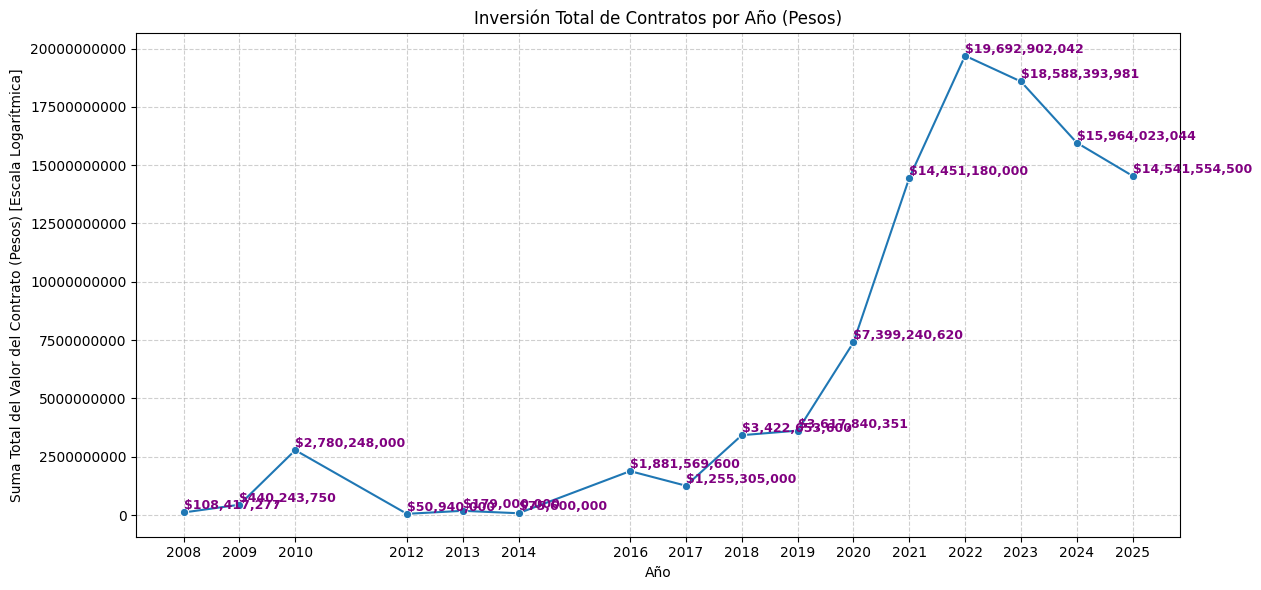


  → Gráfica de Inversión Total en Pesos por Año completada.

--- Gráfica 1 Completada ---


In [ ]:
# --- Gráfica 1: Inversión Total de Contratos por Año (Pesos) ---

print("--- Generando Gráfica de Inversión Total de Contratos por Año (Pesos) ---")

# Asegurarnos de que df_yearly_sum esté disponible y tenga las columnas necesarias
if 'df_yearly_sum' in locals() and not df_yearly_sum.empty and 'Año' in df_yearly_sum.columns and 'valor_final' in df_yearly_sum.columns:
    print("  → DataFrame 'df_yearly_sum' encontrado. Iniciando gráfica de valor total en Pesos por Año.")

    # Agrupar por año y sumar el valor final (asegurando que 'valor_final' sea numérico)
    # Esto ya debería estar hecho en la celda anterior, pero lo repetimos por seguridad
    df_yearly_sum['valor_final'] = pd.to_numeric(df_yearly_sum['valor_final'], errors='coerce')
    yearly_value_sum_pesos = df_yearly_sum.groupby('Año')['valor_final'].sum().reset_index()

    if not yearly_value_sum_pesos.empty:
        print("\n  → Valores anuales en Pesos:")
        display(yearly_value_sum_pesos) # Display the annual values

        print("\n  → Visualizando la suma total del valor de los contratos por año (Pesos)...")

        plt.figure(figsize=(12, 6))
        ax = sns.lineplot(data=yearly_value_sum_pesos, x='Año', y='valor_final', marker='o')

        plt.yscale('linear') # Aplicar escala logarítmica al eje Y

        # Ajustar formato del eje Y para mostrar números enteros sin notación exponencial
        from matplotlib.ticker import ScalarFormatter
        for axis in [ax.yaxis]:
            axis.set_major_formatter(ScalarFormatter())
        ax.ticklabel_format(style='plain', axis='y') # Force plain notation

        plt.title('Inversión Total de Contratos por Año (Pesos)')
        plt.xlabel('Año')
        plt.ylabel('Suma Total del Valor del Contrato (Pesos) [Escala Logarítmica]') # Actualizar etiqueta
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xticks(yearly_value_sum_pesos['Año']) # Asegurar que se muestren todos los años como ticks
        plt.tight_layout()

        # Añadir etiquetas de valor a cada punto
        for index, row in yearly_value_sum_pesos.iterrows():
            ax.text(row['Año'], row['valor_final'], f'${row['valor_final']:,}', color='purple', ha="left", va="bottom", fontsize=9, fontweight='bold')

        plt.show()

        print("\n  → Gráfica de Inversión Total en Pesos por Año completada.")

    else:
        print("  ⚠️ No hay datos de valor total por año (Pesos) para visualizar.")

else:
    print("  ⚠️ DataFrame 'df_yearly_sum' no encontrado o está vacío, o faltan columnas. No se puede generar la gráfica.")

print("\n--- Gráfica 1 Completada ---")

--- Generando Gráfica de Inversión Total de Contratos por Año (SMLV) ---
  → DataFrame 'df_yearly_sum' encontrado. Iniciando gráfica de valor total en SMLV por Año.
  → Recalculando valores de SMLV y Valor en SMLV (Actualizando 2025)...
     ✅ Valores de SMLV y Valor en SMLV recalculados.

  → Valores anuales en SMLV:


Año  Valor_en_SMLV
0   2008     234.923677
1   2009     885.980580
2   2010    5398.539806
3   2012      89.888830
4   2013     303.647159
5   2014     122.727273
6   2016    2729.071990
7   2017    1701.607798
8   2018    4381.041470
9   2019    4368.760356
10  2020    8429.272422
11  2021   15906.182102
12  2022   19692.902042
13  2023   16024.477570
14  2024   12280.017726
15  2025   10028.658276


  → Visualizando la suma total del valor de los contratos por año (SMLV)...


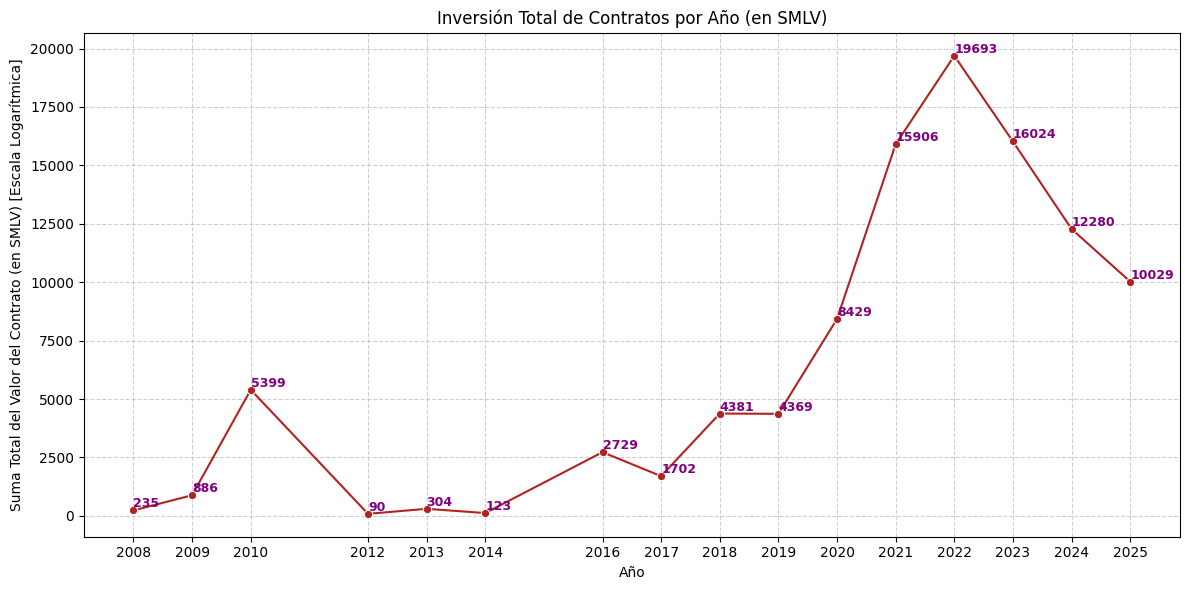


  → Gráfica de Inversión Total en SMLV por Año completada.

--- Gráfica 2 Completada ---


In [ ]:
# --- Gráfica 2: Inversión Total de Contratos por Año (SMLV) ---

print("--- Generando Gráfica de Inversión Total de Contratos por Año (SMLV) ---")

# Asegurarnos de que df_yearly_sum esté disponible y tenga las columnas necesarias
if 'df_yearly_sum' in locals() and not df_yearly_sum.empty and 'Año' in df_yearly_sum.columns and 'valor_final' in df_yearly_sum.columns:
    print("  → DataFrame 'df_yearly_sum' encontrado. Iniciando gráfica de valor total en SMLV por Año.")

    # --- Recalcular valores de SMLV y Valor en SMLV con el valor actualizado para 2025 ---
    print("  → Recalculando valores de SMLV y Valor en SMLV (Actualizando 2025)...")

    # Diccionario con los valores de SMLV en Colombia por año (fuente: Ministerio de Trabajo Colombia, datos aproximados para algunos años)
    smlv_by_year_updated = {
        2008: 461500,
        2009: 496900,
        2010: 515000,
        2011: 535600,
        2012: 566700,
        2013: 589500,
        2014: 616000,
        2015: 644350,
        2016: 689454,
        2017: 737717,
        2018: 781242,
        2019: 828116,
        2020: 877803,
        2021: 908526,
        2022: 1000000,
        2023: 1160000,
        2024: 1300000,
        2025: 1450000 # Valor actualizado para 2025
    }

    # Agrupar por año y sumar el valor final (asegurando que 'valor_final' sea numérico)
    df_yearly_sum['valor_final'] = pd.to_numeric(df_yearly_sum['valor_final'], errors='coerce')
    yearly_value_sum_smlv_calc = df_yearly_sum.groupby('Año')['valor_final'].sum().reset_index()

    # Mapear los valores de SMLV actualizados al DataFrame
    yearly_value_sum_smlv_calc['SMLV_Año'] = yearly_value_sum_smlv_calc['Año'].map(smlv_by_year_updated)

    # Calcular el valor total en SMLV
    yearly_value_sum_smlv_calc['Valor_en_SMLV'] = yearly_value_sum_smlv_calc.apply(
        lambda row: row['valor_final'] / row['SMLV_Año'] if pd.notnull(row['SMLV_Año']) and row['SMLV_Año'] > 0 else None,
        axis=1
    )
    print("     ✅ Valores de SMLV y Valor en SMLV recalculados.")


    if not yearly_value_sum_smlv_calc.empty:
        print("\n  → Valores anuales en SMLV:")
        display(yearly_value_sum_smlv_calc[['Año', 'Valor_en_SMLV']]) # Display the annual SMLV values

        print("\n  → Visualizando la suma total del valor de los contratos por año (SMLV)...")

        plt.figure(figsize=(12, 6))
        ax = sns.lineplot(data=yearly_value_sum_smlv_calc, x='Año', y='Valor_en_SMLV', marker='o', color='firebrick')

        plt.yscale('linear') # Aplicar escala logarítmica al eje Y

        plt.title('Inversión Total de Contratos por Año (en SMLV)')
        plt.xlabel('Año')
        plt.ylabel('Suma Total del Valor del Contrato (en SMLV) [Escala Logarítmica]') # Actualizar etiqueta
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xticks(yearly_value_sum_smlv_calc['Año']) # Asegurar que se muestren todos los años como ticks
        plt.tight_layout()

        # Añadir etiquetas de valor a cada punto
        for index, row in yearly_value_sum_smlv_calc.iterrows():
            ax.text(row['Año'], row['Valor_en_SMLV'], f'{row['Valor_en_SMLV']:.0f}', color='purple', ha="left", va="bottom", fontsize=9, fontweight='bold')

        plt.show()

        print("\n  → Gráfica de Inversión Total en SMLV por Año completada.")

    else:
        print("  ⚠️ No hay datos de valor total por año (SMLV) para visualizar.")

else:
    print("  ⚠️ DataFrame 'df_yearly_sum' no encontrado o está vacío, o faltan columnas. No se puede generar la gráfica.")

print("\n--- Gráfica 2 Completada ---")

--- Generando Gráfica de Crecimiento Porcentual Anual (Valor Contratos vs. SMLV) ---
  → DataFrame 'yearly_value_sum_smlv_calc' encontrado. Iniciando análisis de crecimiento porcentual.
  → Calculando crecimiento porcentual anual para Valor Total de Contratos...
     ✅ Crecimiento porcentual de Valor Contratos calculado.
  → Calculando crecimiento porcentual anual para SMLV...
     ✅ Crecimiento porcentual de SMLV calculado.

  → Visualizando la comparación del crecimiento porcentual anual...


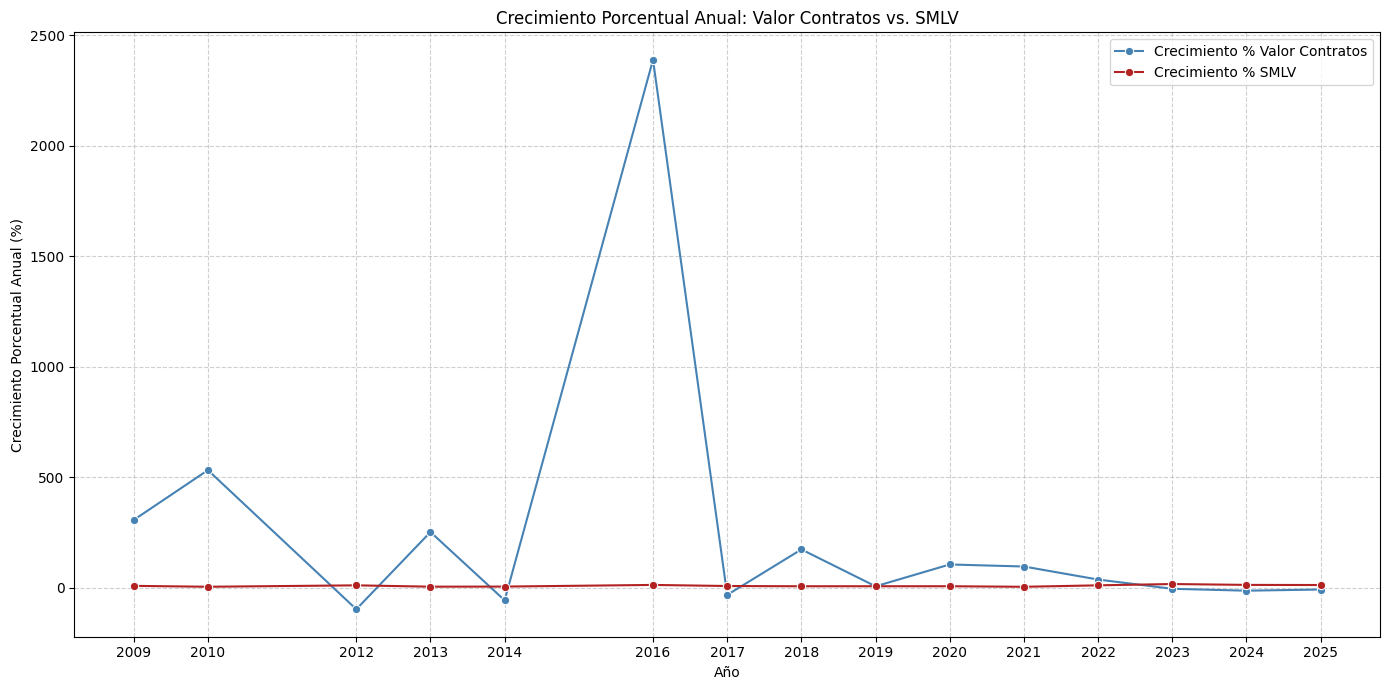


  → Gráfica de Crecimiento Porcentual Anual completada.

--- Gráfica 3 Completada ---


In [ ]:
# --- Gráfica 3: Crecimiento Porcentual Anual (Valor Contratos vs. SMLV) ---

print("--- Generando Gráfica de Crecimiento Porcentual Anual (Valor Contratos vs. SMLV) ---")

# Asegurarnos de que yearly_value_sum_smlv_calc esté disponible y tenga las columnas necesarias
# Este DataFrame ya contiene 'Año', 'valor_final', 'SMLV_Año', 'Valor_en_SMLV'
if 'yearly_value_sum_smlv_calc' in locals() and not yearly_value_sum_smlv_calc.empty:
    print("  → DataFrame 'yearly_value_sum_smlv_calc' encontrado. Iniciando análisis de crecimiento porcentual.")

    # Calcular el crecimiento porcentual anual para el valor total de contratos
    print("  → Calculando crecimiento porcentual anual para Valor Total de Contratos...")
    yearly_value_sum_smlv_calc['Crecimiento_%_Valor_Contratos'] = yearly_value_sum_smlv_calc['valor_final'].pct_change() * 100
    print("     ✅ Crecimiento porcentual de Valor Contratos calculado.")

    # Calcular el crecimiento porcentual anual para el SMLV
    print("  → Calculando crecimiento porcentual anual para SMLV...")
    yearly_value_sum_smlv_calc['Crecimiento_%_SMLV'] = yearly_value_sum_smlv_calc['SMLV_Año'].pct_change() * 100
    print("     ✅ Crecimiento porcentual de SMLV calculado.")


    # Eliminar la primera fila (ya que el crecimiento porcentual para el primer año es NaN)
    df_growth = yearly_value_sum_smlv_calc.dropna(subset=['Crecimiento_%_Valor_Contratos', 'Crecimiento_%_SMLV']).copy()

    if not df_growth.empty:
        print("\n  → Visualizando la comparación del crecimiento porcentual anual...")

        plt.figure(figsize=(14, 7))
        # Graficar el crecimiento porcentual del valor de los contratos
        sns.lineplot(data=df_growth, x='Año', y='Crecimiento_%_Valor_Contratos', marker='o', label='Crecimiento % Valor Contratos', color='steelblue')
        # Graficar el crecimiento porcentual del SMLV
        sns.lineplot(data=df_growth, x='Año', y='Crecimiento_%_SMLV', marker='o', label='Crecimiento % SMLV', color='firebrick')

        plt.title('Crecimiento Porcentual Anual: Valor Contratos vs. SMLV')
        plt.xlabel('Año')
        plt.ylabel('Crecimiento Porcentual Anual (%)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xticks(df_growth['Año']) # Asegurar que se muestren todos los años como ticks
        plt.legend()
        plt.tight_layout()
        plt.show()

        print("\n  → Gráfica de Crecimiento Porcentual Anual completada.")

    else:
        print("  ⚠️ No hay suficientes datos (al menos dos años) para calcular el crecimiento porcentual anual.")

else:
    print("  ⚠️ DataFrame 'yearly_value_sum_smlv_calc' no encontrado o está vacío. No se puede generar la gráfica de crecimiento porcentual.")

print("\n--- Gráfica 3 Completada ---")

## **TRABAJO FUTURO** Lucha con IA en favor de las mujeres del Valle del Cauca


1. Marco teórico (ordenanza DAO + Control y Curúl de oposición)
2. Estado del arte (contraloría diari)
3. Definición del problema (DESDE PUNTO DE VISTA DE LA CURÚL DE OPOSICIÓN)!!!
4. Objetivos
5. Decisión de enfoque supervisado/no
6. supervisado (o ambos)
7. Validación de modelos
8. Optimización de modelos
9. Comparación de modelos
10. Conclusiones









**Agrupamiento de Contratos** (Clustering): Utilizar algoritmos de clustering (como K-Means, DBSCAN o Hierarchical Clustering) para identificar segmentos naturales o grupos de contratos que comparten características similares. Esto podría revelar patrones ocultos en el tipo de contratos, entidades involucradas, objetos contractuales o modalidades de selección, sin necesidad de etiquetas previas. El objetivo sería agrupar contratos con 'objeto_a_contratar' e 'objeto_del_proceso' similares, valores de contrato en ciertos rangos, o que involucran a las mismas entidades/contratistas.

**Detección de Anomalías (Unsupervised Anomaly Detection):** Implementar técnicas de detección de anomalías no supervisadas (como Isolation Forest, One-Class SVM o Autoencoders) para identificar contratos inusuales que se desvían de la norma en el conjunto de datos. Estos contratos 'anómalos' podrían representar errores de datos, actividades fraudulentas o transacciones excepcionalmente raras que merecen una investigación más profunda. Los algoritmos buscarían patrones atípicos en el 'valor_final', combinaciones raras de 'tipo_de_contrato'/'modalidad_de_contratación' con el 'objeto_a_contratar', o fechas de duración inusualmente largas/cortas.


**Análisis de Componentes Principales y Visualización** (PCA/t-SNE): Aplicar métodos de reducción de dimensionalidad como el Análisis de Componentes Principales (PCA) o t-Distributed Stochastic Neighbor Embedding (t-SNE) para transformar las características de los contratos a un espacio de menor dimensión, facilitando la visualización. Esto nos permitiría observar 'clusters' naturales o 'outliers' visuales en un gráfico 2D o 3D, ayudando a la interpretación de la estructura subyacente de los datos y a la detección temprana de patrones o anomalías que no son evidentes en el espacio original de alta dimensión.

**Modelado de Temas (Topic Modeling) en Objeto Contractual:** Utilizar técnicas de Modelado de Temas como Latent Dirichlet Allocation (LDA) o Non-negative Matrix Factorization (NMF) en los campos de texto 'objeto_a_contratar' y 'objeto_del_proceso'. El objetivo es descubrir grupos de palabras que co-ocurren frecuentemente, representando 'temas' ocultos en los contratos. Luego, podemos analizar cómo estos temas se distribuyen entre las diferentes 'entidades', 'tipos de contrato' o 'rangos de valor', y si ciertos temas están asociados con valores de contrato más altos o contratistas específicos.

**Agrupamiento Semántico de Contratos usando Embeddings de Texto:** Transformar el texto de los 'objetos contractuales' en representaciones vectoriales numéricas densas (embeddings) utilizando técnicas como TF-IDF combinado con PCA/SVD, o embeddings pre-entrenados como Word2Vec/Doc2Vec o modelos de transformadores (por ejemplo, Sentence-BERT). Una vez que los textos estén representados como vectores, aplicar algoritmos de clustering (como K-Means, HDBSCAN o Agglomerative Clustering) para agrupar contratos con descripciones semánticamente similares. Esto nos permitiría identificar grupos de contratos con propósitos similares que quizás no estén explícitamente categorizados, y luego correlacionarlos con variables como el 'valor_final', 'modalidad_de_contratación' o la 'entidad'.

**Detección de Anomalías Textuales en Objetos Contractuales:** Identificar contratos donde la descripción textual ('objeto_a_contratar' o 'objeto_del_proceso') es inusual o se desvía significativamente del 'lenguaje estándar' del resto de los contratos. Esto se puede lograr combinando embeddings de texto (como en la idea anterior) con algoritmos de detección de anomalías no supervisados (ej., Isolation Forest, One-Class SVM o Autoencoders) aplicados a la distribución de los embeddings. Los contratos con descripciones textualmente atípicas podrían señalar errores, ambigüedad deliberada o contratos que merecen una revisión manual, y podríamos explorar si estas anomalías textuales se correlacionan con valores extremos, contratistas específicos o modalidades de selección inusuales.

**Análisis de Redes y Grafos de Contratación:** Construir una red donde los nodos representen a las entidades (Gobernación, Secretarías, Contratistas) y los enlaces representen la existencia de contratos entre ellos. Utilizar algoritmos de teoría de grafos para identificar patrones estructurales, como nodos con alta centralidad (que actúan como 'hubs' importantes), detección de comunidades (grupos de entidades o contratistas que interactúan frecuentemente entre sí) o patrones de conexión anómalos. Este análisis revelaría la estructura oculta del ecosistema de contratación sin necesidad de etiquetas previas sobre la importancia o relación de los actores.

**Minería de Patrones Secuenciales en el Ciclo de Vida del Contrato:** Aplicar técnicas de minería de patrones secuenciales a la secuencia de eventos o cambios de estado de los contratos (utilizando columnas como fecha_de_firma_del_contrato, fecha_inicio_ejecuci_n, estado_del_proceso). El objetivo es descubrir las secuencias de eventos más comunes y las desviaciones de estas secuencias. Esto podría identificar flujos de trabajo estándar o, por el contrario, señalar procesos inusuales o posibles cuellos de botella/irregularidades en la gestión de los contratos sin depender de un etiquetado manual de 'procesos correctos' o 'incorrectos'.

**Descubrimiento de Estructuras Latentes con Modelos Generativos para Texto:** Ir más allá del modelado de temas tradicional aplicando modelos generativos no supervisados, como Autoencoders Variacionales (VAE) o redes neuronales capaces de aprender representaciones latentes de los documentos. Estas técnicas se aplicarían al texto de 'objeto_a_contratar' y 'objeto_del_proceso' para comprimir la información textual en un espacio de dimensiones mucho más bajo. El análisis de estas dimensiones latentes podría revelar estructuras conceptuales profundas o categorías semánticas más abstractas que los 'tópicos' directos, ofreciendo una nueva perspectiva sobre la organización y el significado subyacente de los contratos.

In [ ]:
# --- Cargar DataFrame desde Google Drive ---

print("--- Cargando DataFrame desde Google Drive ---")

# Montar Google Drive
print("  → Montando Google Drive...")
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("     ✅ Google Drive montado correctamente.")
    drive_mounted = True
except Exception as e:
    print(f"     ❌ Error al montar Google Drive: {e}")
    drive_mounted = False

if drive_mounted:
    # Definir la ruta del archivo CSV en Google Drive
    folder_path = '/content/drive/MyDrive/hacemos con ingenieria'
    output_filename = 'contratos_analisis_exploratorio.csv'
    output_filepath = f'{folder_path}/{output_filename}'

    # Verificar si el archivo existe antes de intentar cargarlo
    import os
    if os.path.exists(output_filepath):
        print(f"\n  → Archivo encontrado: '{output_filepath}'. Cargando DataFrame...")
        try:
            df_contracts_loaded = pd.read_csv(output_filepath)
            print("     ✅ DataFrame cargado exitosamente.")
            # Asignar al nombre original del DataFrame si es necesario para análisis posteriores
            df_contracts = df_contracts_loaded
        except Exception as e:
            print(f"     ❌ Error al cargar DataFrame desde Drive: {e}")
            df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío en caso de error
    else:
        print(f"\n  ⚠️ Archivo no encontrado en la ruta: '{output_filepath}'.")
        df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si el archivo no existe

else:
    print("  ⚠️ Google Drive no se montó correctamente. No se puede cargar el DataFrame.")
    df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si Drive no está montado

print("\n--- Carga desde Drive Completada ---")

--- Cargando DataFrame desde Google Drive ---
  → Montando Google Drive...
Mounted at /content/drive
     ✅ Google Drive montado correctamente.

  → Archivo encontrado: '/content/drive/MyDrive/hacemos con ingenieria/contratos_analisis_exploratorio.csv'. Cargando DataFrame...
     ✅ DataFrame cargado exitosamente.

--- Carga desde Drive Completada ---


In [ ]:
import pandas as pd

print("--- Variables y DataFrames cargados en memoria ---")

# Obtener todas las variables en el scope actual
local_vars = list(locals().keys())

# Filtrar y mostrar DataFrames de pandas
dataframes_in_memory = {}
for var_name in local_vars:
    if isinstance(locals()[var_name], pd.DataFrame):
        df = locals()[var_name]
        dataframes_in_memory[var_name] = {
            'shape': df.shape,
            'columns': list(df.columns),
            'memory_usage': f'{df.memory_usage(deep=True).sum() / (1024**2):.2f} MB'
        }

if dataframes_in_memory:
    print("\n✅ DataFrames de pandas encontrados:")
    for name, info in dataframes_in_memory.items():
        print(f"  - '{name}':")
        print(f"    - Dimensiones: {info['shape']}")
        print(f"    - Columnas: {info['columns']}")
        print(f"    - Uso de memoria: {info['memory_usage']}")
else:
    print("  ⚠️ No se encontraron DataFrames de pandas cargados en memoria.")

# También podemos listar otras variables importantes si es necesario
other_important_vars = [
    'DOMAIN', 'DATASET_ID', 'RESOURCE_URL', 'APP_TOKEN', 'HEADERS',
    'where_clause_target_contracts',
    'all_contracts_data', # Lista de diccionarios antes de DataFrame
    'total_expected_records',
    'NIT_VARIANTS', 'ENTITY_NAME_VARIANTS', 'GENDER_KEYWORDS', 'EXCLUDED_PHRASES',
    'smlv_by_year_updated'
]

found_other_vars = {}
for var_name in other_important_vars:
    if var_name in locals():
        value = locals()[var_name]
        if var_name == 'all_contracts_data':
            found_other_vars[var_name] = f"List (len: {len(value)})"
        elif isinstance(value, (str, int, float, bool, list, dict, set)):
            # Limitar la visualización de listas/dicts grandes para no saturar
            if isinstance(value, (list, dict, set)) and len(str(value)) > 100:
                found_other_vars[var_name] = f"{type(value).__name__} (len: {len(value)}, snippet: {str(value)[:50]}...)"
            else:
                found_other_vars[var_name] = value

if found_other_vars:
    print("\n✅ Otras variables importantes encontradas:")
    for name, value in found_other_vars.items():
        print(f"  - '{name}': {value}")
else:
    print("  ⚠️ No se encontraron otras variables importantes cargadas en memoria.")

print("\n--- Revisión de memoria completada ---")

--- Variables y DataFrames cargados en memoria ---

✅ DataFrames de pandas encontrados:
  - 'df_contracts_loaded':
    - Dimensiones: (2493, 28)
    - Columnas: ['nivel_entidad', 'codigo_entidad_en_secop', 'nombre_de_la_entidad', 'nit_de_la_entidad', 'departamento_entidad', 'municipio_entidad', 'estado_del_proceso', 'modalidad_de_contrataci_n', 'objeto_a_contratar', 'objeto_del_proceso', 'tipo_de_contrato', 'fecha_de_firma_del_contrato', 'fecha_inicio_ejecuci_n', 'fecha_fin_ejecuci_n', 'numero_del_contrato', 'numero_de_proceso', 'valor_contrato', 'nom_raz_social_contratista', 'url_contrato', 'origen', 'tipo_documento_proveedor', 'documento_proveedor', 'nombre_entidad_corto', 'valor_final', 'Rango_Valor_Fijo', 'Año_Contrato', 'modalidad_corta', 'nom_raz_social_contratista_corto']
    - Uso de memoria: 5.82 MB
  - 'df_contracts':
    - Dimensiones: (2493, 28)
    - Columnas: ['nivel_entidad', 'codigo_entidad_en_secop', 'nombre_de_la_entidad', 'nit_de_la_entidad', 'departamento_entidad', 

In [ ]:
# --- Descargar DataFrame a la computadora local ---

print("--- Iniciando descarga del DataFrame --- ")

# Asegurarnos de que df_contracts esté disponible
if 'df_contracts' in locals() and not df_contracts.empty:
    try:
        from google.colab import files
        output_filename = 'contratos_final_para_analisis.csv'
        df_contracts.to_csv(output_filename, index=False)
        files.download(output_filename)
        print(f"  ✅ DataFrame '{output_filename}' descargado exitosamente.")
    except Exception as e:
        print(f"  ❌ Error al descargar el DataFrame: {e}")
        print("     Asegùrate de que estás ejecutando este código en un entorno de Google Colab y que tengas los permisos necesarios.")
else:
    print("  ⚠ï¸ DataFrame 'df_contracts' no encontrado o está vacío. No se puede descargar.")

print("--- Proceso de descarga completado ---")

--- Iniciando descarga del DataFrame --- 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  ✅ DataFrame 'contratos_final_para_analisis.csv' descargado exitosamente.
--- Proceso de descarga completado ---
